<a href="https://colab.research.google.com/github/snwnkang/CS109A_Final/blob/main/Final_Project_CS109_Milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operational Energy
Building operational energy is the required energy to run a building once it is occupied and functioning. In contrast to embodied energy, which refers to energy consumed in the production of materials, transportation and construction of the building, operational energy is primarily concerned with the energy consumption during a building's life cycle, and typically it constitutes the majority of any building's Life Cycle Energy (LCE) use.
<br>
<br>
$\Large \frac{(kWh) \: \text{Annual Energy Consumption}}{(m^2) \: \text{Total Floor area}}$
<br>
<br>
#### Energy consuming systems include:

- Space Heating
- Space Cooling
- Ventilation
- Lighting
- Plug Loads
- Water Heating

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/230421_operational_novent_cleaned_32k.csv")

In [3]:
df["program"].head(2)

0    6
1    6
Name: program, dtype: int64

**Verify that there are no missing values**

In this case, the data was produced by our groupmate Lucy, who had already done significant work in cleaning and maintaining the data. We confirm below that there are no *missing values* for any of the columns.

In [4]:
#confirm there are no missing values
df_missingness = df.isna().sum()
df_missingness

seed                                 0
Equipment                            0
WallType                             0
Orientation                          0
Efficiency                           0
NaturalVentilation                   0
SensibleRate                         0
LatentRate                           0
ThermalPerformance                   0
ThermalMassFlip                      0
nonMassWallR [m^2-K/W]               0
MassWallR [m^2-K/W]                  0
RoofR [m^2-K/W]                      0
InteriorFloorR [m^2-K/W]             0
ExteriorFloorR [m^2-K/W]             0
WWRnorth                             0
WWRwest                              0
WWRsouth                             0
WWReast                              0
SHGC                                 0
WindowR [m^2-K/W]                    0
BuildingVolumn [m^3]                 0
TotalFloorArea [m^2]                 0
f2fHeight [m]                        0
numFloor                             0
TotalRoofArea [m^2]      

In [5]:
selected_columns = [
    'program',
    'Equipment',
    'Orientation',
    'nonMassWallR [m^2-K/W]',
    'MassWallR [m^2-K/W]',
    'RoofR [m^2-K/W]',
    'InteriorFloorR [m^2-K/W]',
    'ExteriorFloorR [m^2-K/W]',
    'WWRnorth',
    'WWRwest',
    'WWRsouth',
    'WWReast',
    'SHGC',
    'WindowR [m^2-K/W]',
    'numFloor',
    'AspectRatio',
    'WallType',
    'BuildingVolumn [m^3]',
    'TotalFacadeArea [m^2]',
    'CoolingElecPerArea [KWh/yr/m^2]',
    'HeatingElecPerArea [KWh/yr/m^2]',
    'HeatingGasPerArea [KWh/yr/m^2]',
    'FanElecPerArea [KWh/yr/m^2]',
    'PumpElecPerArea [KWh/yr/m^2]',
    'LightElecPerArea [KWh/yr/m^2]',
    'ApplianceElecPerArea [KWh/yr/m^2]',
    'ApplianceGasPerArea [KWh/yr/m^2]',
    'HotWaterPerArea [KWh/yr/m^2]'
]

In [6]:
df_sel = df.loc[:, selected_columns]
df_sel.head(5)

program  Equipment  Orientation  nonMassWallR [m^2-K/W]  \
0        6          1          348                    2.88   
1        6          5           96                    3.58   
2        3          4          182                    2.21   
3        5          0          359                    0.00   
4        4          5          317                    2.02   

   MassWallR [m^2-K/W]  RoofR [m^2-K/W]  InteriorFloorR [m^2-K/W]  \
0                 0.00             8.38                       0.7   
1                 0.00            10.49                       0.7   
2                 0.00             5.52                       0.7   
3                 2.03             5.52                       0.7   
4                 0.00             4.40                       0.7   

   ExteriorFloorR [m^2-K/W]  WWRnorth  WWRwest  ...  TotalFacadeArea [m^2]  \
0                      5.38      0.23     0.11  ...                 838.42   
1                      6.61      0.32     0.24  ...                1752.68   
2                      3.43      0.38     0.37  ...                4870.35   
3                      3.08      0.42     0.38  ...                6688.49   
4                      4.68      0.90     0.90  ...                9515.83   

   CoolingElecPerArea [KWh/yr/m^2]  HeatingElecPerArea [KWh/yr/m^2]  \
0                        27.738170                         0.655711   
1                        29.263610                         0.000000   
2                        51.284081                         0.000689   
3                        23.836787                         0.000000   
4                        34.512464                         0.000000   

   HeatingGasPerArea [KWh/yr/m^2]  FanElecPerArea [KWh/yr/m^2]  \
0                        0.000000                    37.381036   
1                        4.925151                     6.158374   
2                        0.000000                    10.425784   
3                        1.476935                    30.337577   
4                       13.066668                     7.127550   

   PumpElecPerArea [KWh/yr/m^2]  LightElecPerArea [KWh/yr/m^2]  \
0                      0.000000                      48.761679   
1                     11.487335                      48.761679   
2                     13.536407                      23.584477   
3                      0.000000                      11.131444   
4                     10.991456                      25.570450   

   ApplianceElecPerArea [KWh/yr/m^2]  ApplianceGasPerArea [KWh/yr/m^2]  \
0                          23.747175                          0.000000   
1                          23.747175                          0.000000   
2                          56.731922                         73.547939   
3                          32.118759                          0.000000   
4                          30.902514                          0.000000   

   HotWaterPerArea [KWh/yr/m^2]  
0                      3.331522  
1                      3.331522  
2                     26.657480  
3                     27.453894  
4                      2.562507  

[5 rows x 28 columns]

In [7]:
df_sel.describe()

program     Equipment   Orientation  nonMassWallR [m^2-K/W]  \
count  32500.000000  32500.000000  32500.000000            32500.000000   
mean       4.489169      2.506369    179.894585                2.384207   
std        2.862389      1.706247    104.237783                1.472428   
min        0.000000      0.000000      0.000000                0.000000   
25%        2.000000      1.000000     90.000000                1.500000   
50%        4.000000      3.000000    180.000000                2.210000   
75%        7.000000      4.000000    270.000000                3.580000   
max        9.000000      5.000000    360.000000                5.520000   

       MassWallR [m^2-K/W]  RoofR [m^2-K/W]  InteriorFloorR [m^2-K/W]  \
count         32500.000000     32500.000000              3.250000e+04   
mean              0.321344         5.930260              7.000000e-01   
std               0.814431         1.614038              1.110240e-16   
min               0.000000         3.760000              7.000000e-01   
25%               0.000000         4.640000              7.000000e-01   
50%               0.000000         5.520000              7.000000e-01   
75%               0.000000         6.400000              7.000000e-01   
max               3.790000        10.490000              7.000000e-01   

       ExteriorFloorR [m^2-K/W]      WWRnorth       WWRwest  ...  \
count              32500.000000  32500.000000  32500.000000  ...   
mean                   4.133882      0.516276      0.516068  ...   
std                    1.772313      0.264802      0.264985  ...   
min                    0.610000      0.100000      0.100000  ...   
25%                    3.080000      0.290000      0.290000  ...   
50%                    4.680000      0.480000      0.480000  ...   
75%                    5.560000      0.820000      0.820000  ...   
max                    6.610000      0.900000      0.900000  ...   

       TotalFacadeArea [m^2]  CoolingElecPerArea [KWh/yr/m^2]  \
count           32500.000000                     32500.000000   
mean             2439.473324                        41.590416   
std              2128.915040                        30.595159   
min               127.920000                         0.000000   
25%               844.535000                        23.235079   
50%              1615.240000                        33.703803   
75%              3558.667500                        51.936903   
max             12857.950000                       237.422687   

       HeatingElecPerArea [KWh/yr/m^2]  HeatingGasPerArea [KWh/yr/m^2]  \
count                     32500.000000                    32500.000000   
mean                          0.878257                        3.788307   
std                           2.210626                        9.634782   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                           0.536345                        2.114257   
max                          29.362471                      117.112497   

       FanElecPerArea [KWh/yr/m^2]  PumpElecPerArea [KWh/yr/m^2]  \
count                 32500.000000                  32500.000000   
mean                     19.568955                      6.833864   
std                      24.345446                      7.899791   
min                       0.000000                      0.000000   
25%                       4.827764                      0.000000   
50%                       8.058063                      6.027070   
75%                      29.932978                     10.104479   
max                     216.142808                     52.081393   

       LightElecPerArea [KWh/yr/m^2]  ApplianceElecPerArea [KWh/yr/m^2]  \
count                   32500.000000                       32500.000000   
mean                       34.491958             

**Data Imbalance**

Our program variable is a categorical variable, and ranges from 0 - 9, 10 numbers that correspond to the following:

*(The following are ordered, corresponding to 0 - 9)*
- Courthouse
- Full Service Restaurant
- Hospital
- Large Hotel
- Medium Office
- Midrise Apartment
- Retail
- Secondary School
- Supermarket
- Warehouse

Below, we verify that there is a good balance between samples for each program. We do the same for **WallType** which will be an important aspect for prediction later on.

In [8]:
#Data imbalance (confirm that for each program and wall type, there are enough samples)
program_counts = df['program'].value_counts().sort_index()
print(program_counts)

0    3227
1    3257
2    3272
3    3261
4    3236
5    3346
6    3264
7    3261
8    3155
9    3221
Name: program, dtype: int64


In [9]:
program_counts = df['WallType'].value_counts().sort_index()
print(program_counts)

0    10828
1     7231
2     7222
3     7219
Name: WallType, dtype: int64


**New Variable: VolumeToFacadeRatio**

For easier calculations, we create a variable called Volume to Facade Ratio, using the existing building volume and Total Facade Area variables to calculate it, and then we will drop the two.

In [10]:
df_sel['VolumeToFacadeRatio'] = df['BuildingVolumn [m^3]'] / df['TotalFacadeArea [m^2]']

In [11]:
df_sel.head(5)

program  Equipment  Orientation  nonMassWallR [m^2-K/W]  \
0        6          1          348                    2.88   
1        6          5           96                    3.58   
2        3          4          182                    2.21   
3        5          0          359                    0.00   
4        4          5          317                    2.02   

   MassWallR [m^2-K/W]  RoofR [m^2-K/W]  InteriorFloorR [m^2-K/W]  \
0                 0.00             8.38                       0.7   
1                 0.00            10.49                       0.7   
2                 0.00             5.52                       0.7   
3                 2.03             5.52                       0.7   
4                 0.00             4.40                       0.7   

   ExteriorFloorR [m^2-K/W]  WWRnorth  WWRwest  ...  \
0                      5.38      0.23     0.11  ...   
1                      6.61      0.32     0.24  ...   
2                      3.43      0.38     0.37  ...   
3                      3.08      0.42     0.38  ...   
4                      4.68      0.90     0.90  ...   

   CoolingElecPerArea [KWh/yr/m^2]  HeatingElecPerArea [KWh/yr/m^2]  \
0                        27.738170                         0.655711   
1                        29.263610                         0.000000   
2                        51.284081                         0.000689   
3                        23.836787                         0.000000   
4                        34.512464                         0.000000   

   HeatingGasPerArea [KWh/yr/m^2]  FanElecPerArea [KWh/yr/m^2]  \
0                        0.000000                    37.381036   
1                        4.925151                     6.158374   
2                        0.000000                    10.425784   
3                        1.476935                    30.337577   
4                       13.066668                     7.127550   

   PumpElecPerArea [KWh/yr/m^2]  LightElecPerArea [KWh/yr/m^2]  \
0                      0.000000                      48.761679   
1                     11.487335                      48.761679   
2                     13.536407                      23.584477   
3                      0.000000                      11.131444   
4                     10.991456                      25.570450   

   ApplianceElecPerArea [KWh/yr/m^2]  ApplianceGasPerArea [KWh/yr/m^2]  \
0                          23.747175                          0.000000   
1                          23.747175                          0.000000   
2                          56.731922                         73.547939   
3                          32.118759                          0.000000   
4                          30.902514                          0.000000   

   HotWaterPerArea [KWh/yr/m^2]  VolumeToFacadeRatio  
0                      3.331522            11.441270  
1                      3.331522            11.387247  
2                     26.657480             8.153950  
3                     27.453894             7.132345  
4                      2.562507             9.796224  

[5 rows x 29 columns]

**New Variable: Operational Energy = 'OE'**

To calculate the Operational energy (refer to the formula at the beginning) we will sum the values for the systems used in each building. In our data, we have 9 systems to calculate the Operational Energy, we sum them to create a new column 'OE' and will delete the 9 columns.

In [12]:
#filter out the columns with [kWh/yr/m^2]
kwh_col = [col for col in df_sel.columns if '[KWh/yr/m^2]' in col]
kwh_col

['CoolingElecPerArea [KWh/yr/m^2]',
 'HeatingElecPerArea [KWh/yr/m^2]',
 'HeatingGasPerArea [KWh/yr/m^2]',
 'FanElecPerArea [KWh/yr/m^2]',
 'PumpElecPerArea [KWh/yr/m^2]',
 'LightElecPerArea [KWh/yr/m^2]',
 'ApplianceElecPerArea [KWh/yr/m^2]',
 'ApplianceGasPerArea [KWh/yr/m^2]',
 'HotWaterPerArea [KWh/yr/m^2]']

In [13]:
df_sel['OE'] = df_sel[kwh_col].sum(axis=1)
df_sel.head(5)

program  Equipment  Orientation  nonMassWallR [m^2-K/W]  \
0        6          1          348                    2.88   
1        6          5           96                    3.58   
2        3          4          182                    2.21   
3        5          0          359                    0.00   
4        4          5          317                    2.02   

   MassWallR [m^2-K/W]  RoofR [m^2-K/W]  InteriorFloorR [m^2-K/W]  \
0                 0.00             8.38                       0.7   
1                 0.00            10.49                       0.7   
2                 0.00             5.52                       0.7   
3                 2.03             5.52                       0.7   
4                 0.00             4.40                       0.7   

   ExteriorFloorR [m^2-K/W]  WWRnorth  WWRwest  ...  \
0                      5.38      0.23     0.11  ...   
1                      6.61      0.32     0.24  ...   
2                      3.43      0.38     0.37  ...   
3                      3.08      0.42     0.38  ...   
4                      4.68      0.90     0.90  ...   

   HeatingElecPerArea [KWh/yr/m^2]  HeatingGasPerArea [KWh/yr/m^2]  \
0                         0.655711                        0.000000   
1                         0.000000                        4.925151   
2                         0.000689                        0.000000   
3                         0.000000                        1.476935   
4                         0.000000                       13.066668   

   FanElecPerArea [KWh/yr/m^2]  PumpElecPerArea [KWh/yr/m^2]  \
0                    37.381036                      0.000000   
1                     6.158374                     11.487335   
2                    10.425784                     13.536407   
3                    30.337577                      0.000000   
4                     7.127550                     10.991456   

   LightElecPerArea [KWh/yr/m^2]  ApplianceElecPerArea [KWh/yr/m^2]  \
0                      48.761679                          23.747175   
1                      48.761679                          23.747175   
2                      23.584477                          56.731922   
3                      11.131444                          32.118759   
4                      25.570450                          30.902514   

   ApplianceGasPerArea [KWh/yr/m^2]  HotWaterPerArea [KWh/yr/m^2]  \
0                          0.000000                      3.331522   
1                          0.000000                      3.331522   
2                         73.547939                     26.657480   
3                          0.000000                     27.453894   
4                          0.000000                      2.562507   

   VolumeToFacadeRatio          OE  
0            11.441270  141.615293  
1            11.387247  127.674846  
2             8.153950  255.768779  
3             7.132345  126.355396  
4             9.796224  124.733609  

[5 rows x 30 columns]

In [14]:
#drop the columns that are no longer being used
drop_cols = [
    'BuildingVolumn [m^3]',
    'TotalFacadeArea [m^2]',
    ]

drop_cols.extend(kwh_col)

df_sel = df_sel.drop(columns=drop_cols)

In [15]:
df_sel

program  Equipment  Orientation  nonMassWallR [m^2-K/W]  \
0            6          1          348                    2.88   
1            6          5           96                    3.58   
2            3          4          182                    2.21   
3            5          0          359                    0.00   
4            4          5          317                    2.02   
...        ...        ...          ...                     ...   
32495        2          0          275                    3.58   
32496        1          2           20                    4.13   
32497        6          1          330                    4.66   
32498        0          5          276                    3.60   
32499        8          3          177                    2.56   

       MassWallR [m^2-K/W]  RoofR [m^2-K/W]  InteriorFloorR [m^2-K/W]  \
0                     0.00             8.38                       0.7   
1                     0.00            10.49                       0.7   
2                     0.00             5.52                       0.7   
3                     2.03             5.52                       0.7   
4                     0.00             4.40                       0.7   
...                    ...              ...                       ...   
32495                 0.00             8.38                       0.7   
32496                 0.00             6.16                       0.7   
32497                 0.00             6.87                       0.7   
32498                 0.00             5.81                       0.7   
32499                 0.00             6.40                       0.7   

       ExteriorFloorR [m^2-K/W]  WWRnorth  WWRwest  WWRsouth  WWReast  SHGC  \
0                          5.38      0.23     0.11      0.58     0.15  0.36   
1                          6.61      0.32     0.24      0.28     0.48  0.40   
2                          3.43      0.38     0.37      0.56     0.13  0.38   
3                          3.08      0.42     0.38      0.37     0.49  0.38   
4                          4.68      0.90     0.90      0.90     0.90  0.25   
...                         ...       ...      ...       ...      ...   ...   
32495                      5.38      0.33     0.31      0.20     0.35  0.38   
32496                      5.56      0.85     0.85      0.85     0.85  0.40   
32497                      5.56      0.41     0.12      0.56     0.19  0.40   
32498                      5.56      0.87     0.87      0.87     0.87  0.38   
32499                      4.31      0.50     0.42      0.44     0.41  0.40   

       WindowR [m^2-K/W]  numFloor  AspectRatio  WallType  \
0                   0.32         1         2.06         3   
1                   0.43         2         1.00         3   
2                   0.34        12         2.30         0   
3                   0.32        12         1.11         0   
4                   0.22        13         4.51         1   
...                  ...       ...          ...       ...   
32495               0.32         3         1.95         3   
32496               0.43         1         4.67         1   
32497               0.50         1         1.43         1   
32498               0.34         2         3.35         1   
32499               0.43         1         4.42         0   

       VolumeToFacadeRatio          OE  
0                11.441270  141.615293  
1                11.387247  127.674846  
2                 8.153950  255.768779  
3                 7.132345  126.355396  
4                 9.796224  124.733609  
...                    ...         ...  
32495             9.128145  262.489727  
32496             5.381771  831.718861  
32497             7.705619  167.629299  
32498             7.350630  131.890766  
32499            15.378225  142.631624  

[32500 rows x 19 columns]

In [16]:
df_sel_eqp = df_sel['Equipment'].unique()
df_sel_eqp

array([1, 5, 4, 0, 2, 3])

In [17]:
df_sel_wt = df_sel['WallType'].unique()
df_sel_wt

array([3, 0, 1, 2])

In [18]:
df_sel_prg = df_sel['program'].unique()
df_sel_prg

array([6, 3, 5, 4, 7, 2, 1, 0, 8, 9])

**One Hot Encoding**

For the categorical variables program and wall type, we will one-hot-encode, making sure to drop the first column of each (given the condition that if all others have 0, then we safely assume that it will be program 0 or wall type 0)

In [19]:
#separate the categorical variables (PROGRAM, WALL TYPE, EQUIPMENT)
categorical_features = ['Equipment', 'program', 'WallType']
continuous_features = [col for col in df_sel.columns if col not in (categorical_features + ['OE'])]

In [20]:
#one-hot-encoding for categorical variables (program & wall type)
df_sel = pd.get_dummies(df_sel, columns=categorical_features, drop_first=True)

In [21]:
df_sel

Orientation  nonMassWallR [m^2-K/W]  MassWallR [m^2-K/W]  \
0              348                    2.88                 0.00   
1               96                    3.58                 0.00   
2              182                    2.21                 0.00   
3              359                    0.00                 2.03   
4              317                    2.02                 0.00   
...            ...                     ...                  ...   
32495          275                    3.58                 0.00   
32496           20                    4.13                 0.00   
32497          330                    4.66                 0.00   
32498          276                    3.60                 0.00   
32499          177                    2.56                 0.00   

       RoofR [m^2-K/W]  InteriorFloorR [m^2-K/W]  ExteriorFloorR [m^2-K/W]  \
0                 8.38                       0.7                      5.38   
1                10.49                       0.7                      6.61   
2                 5.52                       0.7                      3.43   
3                 5.52                       0.7                      3.08   
4                 4.40                       0.7                      4.68   
...                ...                       ...                       ...   
32495             8.38                       0.7                      5.38   
32496             6.16                       0.7                      5.56   
32497             6.87                       0.7                      5.56   
32498             5.81                       0.7                      5.56   
32499             6.40                       0.7                      4.31   

       WWRnorth  WWRwest  WWRsouth  WWReast  ...  program_3  program_4  \
0          0.23     0.11      0.58     0.15  ...          0          0   
1          0.32     0.24      0.28     0.48  ...          0          0   
2          0.38     0.37      0.56     0.13  ...          1          0   
3          0.42     0.38      0.37     0.49  ...          0          0   
4          0.90     0.90      0.90     0.90  ...          0          1   
...         ...      ...       ...      ...  ...        ...        ...   
32495      0.33     0.31      0.20     0.35  ...          0          0   
32496      0.85     0.85      0.85     0.85  ...          0          0   
32497      0.41     0.12      0.56     0.19  ...          0          0   
32498      0.87     0.87      0.87     0.87  ...          0          0   
32499      0.50     0.42      0.44     0.41  ...          0          0   

       program_5  program_6  program_7  program_8  program_9  WallType_1  \
0              0          1          0          0          0           0   
1              0          1          0          0          0           0   
2              0          0          0          0          0           0   
3              1          0          0          0          0           0   
4              0          0          0          0          0           1   
...          ...        ...        ...        ...        ...         ...   
32495          0          0          0          0          0           0   
32496          0          0          0          0          0           1   
32497          0          1          0          0          0           1   
32498          0          0          0          0          0           1   
32499          0          0          0          1          0           0   

       WallType_2  WallType_3  
0               0           1  
1               0           1  
2               0           0  
3               0           0  
4               0           0  
...           ...         ...  
32495           0           1  
32496           0           0  
32497           0           0  
32498           0           0  
32499           0           0  

[32500 rows x 33 columns]

In [22]:
X = df_sel.drop(columns=['OE'])
y = df_sel['OE']

In [23]:
y.to_csv('response.csv')
X.to_csv('predictors.csv')

In [24]:
X_missingness = X.isna().sum()
X_missingness

Orientation                 0
nonMassWallR [m^2-K/W]      0
MassWallR [m^2-K/W]         0
RoofR [m^2-K/W]             0
InteriorFloorR [m^2-K/W]    0
ExteriorFloorR [m^2-K/W]    0
WWRnorth                    0
WWRwest                     0
WWRsouth                    0
WWReast                     0
SHGC                        0
WindowR [m^2-K/W]           0
numFloor                    0
AspectRatio                 0
VolumeToFacadeRatio         0
Equipment_1                 0
Equipment_2                 0
Equipment_3                 0
Equipment_4                 0
Equipment_5                 0
program_1                   0
program_2                   0
program_3                   0
program_4                   0
program_5                   0
program_6                   0
program_7                   0
program_8                   0
program_9                   0
WallType_1                  0
WallType_2                  0
WallType_3                  0
dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

After splitting, we standardize our data, however, we are not standardizing the categorical variables.

In [26]:
#Standardization of values (except categorical 'program' and 'WallType')
StdScaler = StandardScaler()
X_train_cf_std = StdScaler.fit_transform(X_train[continuous_features])
X_test_cf_std = StdScaler.transform(X_test[continuous_features])

In [27]:
X_train_cf_std_df = pd.DataFrame(X_train_cf_std, index=X_train.index, columns=continuous_features)
X_test_cf_std_df = pd.DataFrame(X_test_cf_std, index=X_test.index, columns=continuous_features)

X_train_std = X_train.copy()
X_test_std = X_test.copy()
X_train_dropped = X_train_std.drop(columns=continuous_features)
X_test_dropped = X_test_std.drop(columns=continuous_features)

X_train_std = pd.concat([X_train_dropped, X_train_cf_std_df], axis=1)
X_test_std = pd.concat([X_test_dropped, X_test_cf_std_df], axis=1)

In [28]:
X_train_std

Equipment_1  Equipment_2  Equipment_3  Equipment_4  Equipment_5  \
8147             0            0            0            0            1   
22206            0            0            0            0            1   
18229            0            0            0            0            0   
4387             0            0            0            1            0   
12862            0            0            0            0            1   
...            ...          ...          ...          ...          ...   
29802            0            0            0            0            0   
5390             0            0            0            0            0   
860              0            0            0            0            0   
15795            1            0            0            0            0   
23654            0            0            0            0            1   

       program_1  program_2  program_3  program_4  program_5  ...  \
8147           0          0          0          0          0  ...   
22206          0          0          0          0          0  ...   
18229          0          0          0          0          0  ...   
4387           0          0          0          1          0  ...   
12862          0          0          0          0          1  ...   
...          ...        ...        ...        ...        ...  ...   
29802          0          0          0          0          0  ...   
5390           0          0          0          1          0  ...   
860            0          0          0          0          0  ...   
15795          0          0          0          0          0  ...   
23654          0          0          0          0          0  ...   

       ExteriorFloorR [m^2-K/W]  WWRnorth   WWRwest  WWRsouth   WWReast  \
8147                   0.096674 -0.891185 -1.006128 -0.177140 -0.930799   
22206                 -1.987742 -0.891185 -0.326741 -0.290419 -0.779911   
18229                  0.800868  1.333876  1.333983  1.333238  1.332524   
4387                   0.800868  0.277915 -0.175766 -1.272164  0.049974   
12862                  0.305115  1.220737  1.220752  1.219960  1.219358   
...                         ...       ...       ...       ...       ...   
29802                  0.699464  1.069886  1.069777  1.068922  1.068470   
5390                   1.392392 -0.061501 -0.704178 -1.460962  0.238584   
860                   -1.976475  1.220737  1.220752  1.219960  1.219358   
15795                  1.392392 -0.400917 -0.364484 -0.516975  0.012252   
23654                  0.305115 -1.494591 -1.345821 -1.234405  0.012252   

           SHGC  WindowR [m^2-K/W]  numFloor  AspectRatio  VolumeToFacadeRatio  
8147   0.989317           1.102001 -0.807970     0.073278            -0.603365  
22206 -1.462160          -1.406185 -0.807970     0.923999            -0.979970  
18229  0.989317           1.804293 -0.807970    -1.512812             1.455198  
4387   0.989317           1.804293 -0.545075    -0.640463             0.023375  
12862 -1.173751          -1.004876  2.872563     0.469800            -0.757718  
...         ...                ...       ...          ...                  ...  
29802 -1.173751          -1.004876 -0.545075     0.448172            -0.033197  
5390   0.989317           1.102001  2.083877    -0.993728            -0.426102  
860   -1.462160          -1.406185 -0.282180     0.217468             0.015089  
15795  0.989317           1.804293 -0.282180    -0.597206             1.428997  
23654 -1.173751          -0.703893 -0.807970     1.176331            -0.727606  

[24375 rows x 32 columns]

In [29]:
X_test_std

Equipment_1  Equipment_2  Equipment_3  Equipment_4  Equipment_5  \
23022            0            0            0            0            1   
22577            0            0            0            0            0   
12639            0            0            0            0            0   
30245            0            0            0            0            0   
4413             0            0            0            0            0   
...            ...          ...          ...          ...          ...   
21979            0            0            0            1            0   
26877            0            0            0            1            0   
15598            0            0            1            0            0   
17223            0            1            0            0            0   
22942            0            1            0            0            0   

       program_1  program_2  program_3  program_4  program_5  ...  \
23022          1          0          0          0          0  ...   
22577          0          0          0          0          0  ...   
12639          0          0          1          0          0  ...   
30245          0          0          1          0          0  ...   
4413           0          0          0          0          0  ...   
...          ...        ...        ...        ...        ...  ...   
21979          0          0          0          0          0  ...   
26877          0          0          0          0          0  ...   
15598          0          0          0          1          0  ...   
17223          0          0          1          0          0  ...   
22942          1          0          0          0          0  ...   

       ExteriorFloorR [m^2-K/W]  WWRnorth   WWRwest  WWRsouth   WWReast  \
23022                  0.800868  1.371589  1.371727  1.370997  1.370246   
22577                  0.293848 -1.042036 -1.270334 -0.705773 -1.194854   
12639                 -1.390585 -0.287778 -1.496796 -0.441456 -0.817633   
30245                  0.305115 -0.514056 -0.628690  0.238214 -0.930799   
4413                   0.305115  1.107599  1.107521  1.106681  1.106192   
...                         ...       ...       ...       ...       ...   
21979                  0.305115  0.277915  0.277159 -0.139381 -0.855355   
26877                 -1.390585 -0.551769 -0.855153 -1.536481 -1.006243   
15598                  0.305115  0.051638 -0.704178 -1.536481 -1.043965   
17223                 -1.987742 -0.476343 -1.270334 -1.007848  0.012252   
22942                  0.699464  1.409302  1.409471  1.408757  1.407968   

           SHGC  WindowR [m^2-K/W]  numFloor  AspectRatio  VolumeToFacadeRatio  
23022  0.989317           1.102001 -0.282180     0.195839            -1.289886  
22577  0.989317           1.804293 -0.545075    -1.419089            -0.514906  
12639 -1.173751          -1.004876  2.609667    -1.678631             0.078627  
30245 -1.173751          -0.703893  1.295191    -1.303737            -0.231837  
4413  -1.173751          -1.004876 -0.019284     1.630530             1.208321  
...         ...                ...       ...          ...                  ...  
21979 -1.173751          -0.703893 -0.807970     1.666578             2.454929  
26877 -1.173751          -1.004876 -0.545075    -1.520022             1.445052  
15598  0.700908          -0.001601  0.506506    -0.885586            -0.249576  
17223 -1.462160          -1.406185  0.506506     0.152582             0.142346  
22942 -1.173751          -0.703893 -0.282180     1.190750            -1.109662  

[8125 rows x 32 columns]

Using **Random Forest Regression**, we observe the feature importance of each variable per program. (we are not taking into account wall type yet)

<ipython-input-30-33cb40d80660>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(continuous_features, rotation=45)


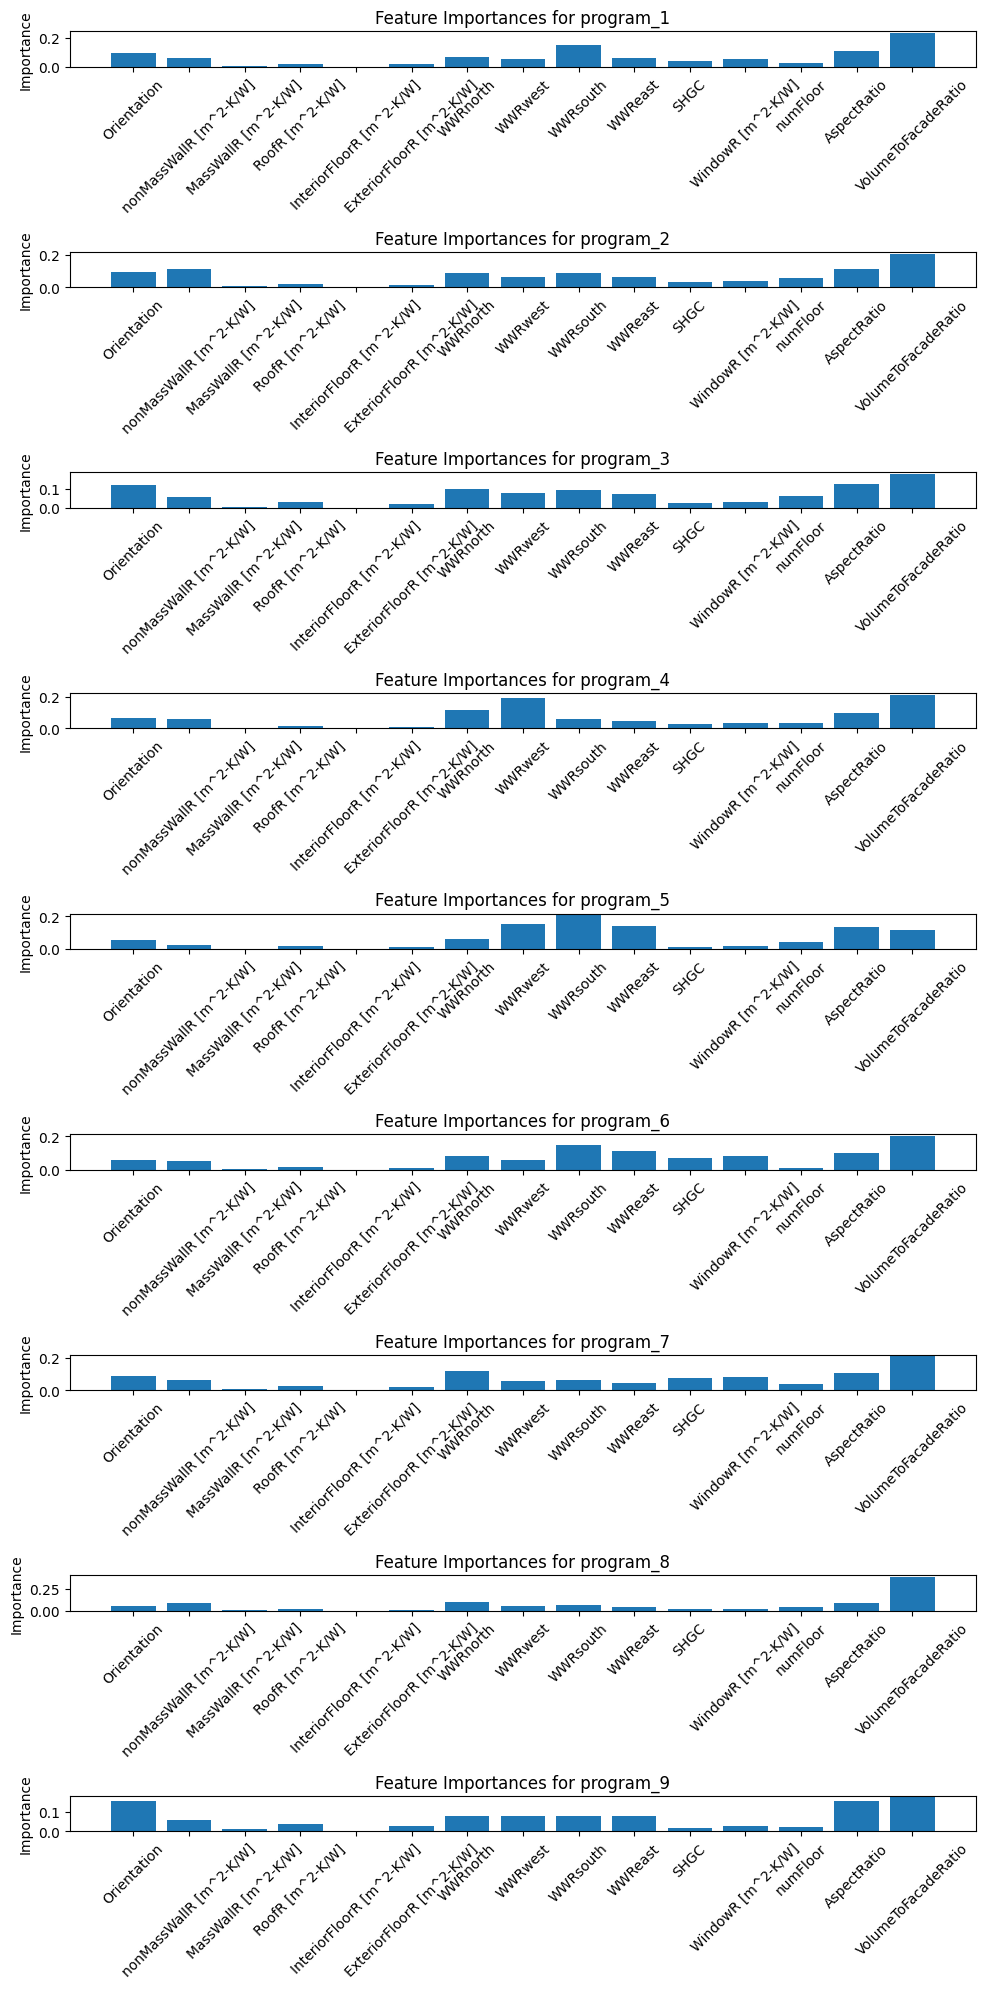

In [30]:
from sklearn.ensemble import RandomForestRegressor

program_columns = [col for col in df_sel.columns if col.startswith('program_')]

program_feature_importances = {}

continuous_features = [feature for feature in continuous_features if feature not in program_columns]

for program in program_columns:
    program_data = df_sel[df_sel[program] == 1]

    X_program = program_data[continuous_features]
    y_program = program_data['OE']

    X_program_std = StdScaler.fit_transform(X_program)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_program_std, y_program)

    importances = model.feature_importances_
    program_feature_importances[program] = importances

#See Feature importance...plot
fig, axes = plt.subplots(nrows=len(program_feature_importances), ncols=1, figsize=(10, 20))

for i, program in enumerate(program_columns):
    axes[i].bar(continuous_features, program_feature_importances[program])
    axes[i].set_title(f'Feature Importances for {program}')
    axes[i].set_ylabel('Importance')
    axes[i].set_xticklabels(continuous_features, rotation=45)

plt.tight_layout()
plt.show()

<br>
<h1>Milestone 3</h1>
<br>
<h2>Exploratory Data Analysis</h2>
<p>The analysis was done by multiple members of the group individually and compiled into a single notebook. The repetition of data analysis may be seen in both Part 1 and 2, however, these procedures were necessary to cross-check and ensure correctness and better comparisons and discussions for the steps moving forward
<br>
<br>
<hr>
<br>
<h1>Data Analysis PART 1</h1>
<br>
<hr>

In [31]:
### Exploratory Analysis

In [32]:
#Making a new data frame that includes all data just for data exploratory and visualization purposes:
df = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/230421_operational_novent_cleaned_32k.csv")
df_sel_du = df.loc[:, selected_columns]
df_sel_du['VolumeToFacadeRatio'] = df['BuildingVolumn [m^3]'] / df['TotalFacadeArea [m^2]']
df_sel_du['OE'] = df_sel_du[kwh_col].sum(axis=1)
df_sel_du = df_sel_du.drop(columns=drop_cols)
df_sel_du.head(2)

program  Equipment  Orientation  nonMassWallR [m^2-K/W]  \
0        6          1          348                    2.88   
1        6          5           96                    3.58   

   MassWallR [m^2-K/W]  RoofR [m^2-K/W]  InteriorFloorR [m^2-K/W]  \
0                  0.0             8.38                       0.7   
1                  0.0            10.49                       0.7   

   ExteriorFloorR [m^2-K/W]  WWRnorth  WWRwest  WWRsouth  WWReast  SHGC  \
0                      5.38      0.23     0.11      0.58     0.15  0.36   
1                      6.61      0.32     0.24      0.28     0.48  0.40   

   WindowR [m^2-K/W]  numFloor  AspectRatio  WallType  VolumeToFacadeRatio  \
0               0.32         1         2.06         3            11.441270   
1               0.43         2         1.00         3            11.387247   

           OE  
0  141.615293  
1  127.674846

In [33]:
#First set of analysis handles to continous variables and the second set of analysis handles categorical variables

In [34]:
#Quantitive variables
cont_cols = ["Orientation", "nonMassWallR [m^2-K/W]", "MassWallR [m^2-K/W]", "RoofR [m^2-K/W]",  "ExteriorFloorR [m^2-K/W]", "WWRnorth", "WWRwest", "WWRsouth", "WWReast", "SHGC", "WindowR [m^2-K/W]", "numFloor", "AspectRatio", "VolumeToFacadeRatio"]

In [35]:
#Categorical variables
cat_cols = ["program", "WallType", "Equipment"]

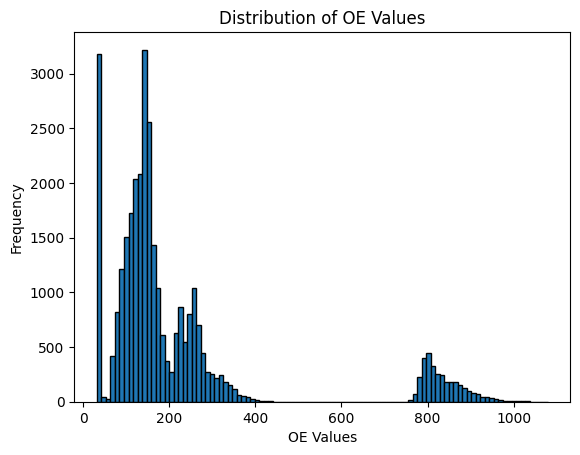

In [36]:
#Distribution of OE values
plt.hist(df_sel_du['OE'], bins=100, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('OE Values')
plt.ylabel('Frequency')
plt.title('Distribution of OE Values')
plt.show()

In [37]:
#Bringing back program names to use in visualizations
program_names = {
    0: "Courthouse",
    1: "Full Service Restaurant",
    2: "Hospital",
    3: "Large Hotel",
    4: "Medium Office",
    5: "Midrise Apartment",
    6: "Retail",
    7: "Secondary School",
    8: "Supermarket",
    9: "Warehouse",
}

In [38]:
#Bringing back wall type names to use in visualizations
wall_names = {
    0: "Mass",
    1: "Steel framed",
    2: "Wood framed",
    3: "Metal"
}

In [39]:
#Bringing back equipment type names to use in visualizations:
equip_names = {
    0: "Packaged Single Zone\n - gas boiler",
    1: "Packaged Single Zone\n - heat pump",
    2: "Variable Air Volume\n air-cooled chiller\n - gas boiler",
    3: "Variable Air Volume\n air-cooled chiller\n - heat pump",
    4: "Variable Air Volume\n chiller with central\n - gas boiler",
    5: "Variable Air Volume\n chiller with central\n - heat pump"
}

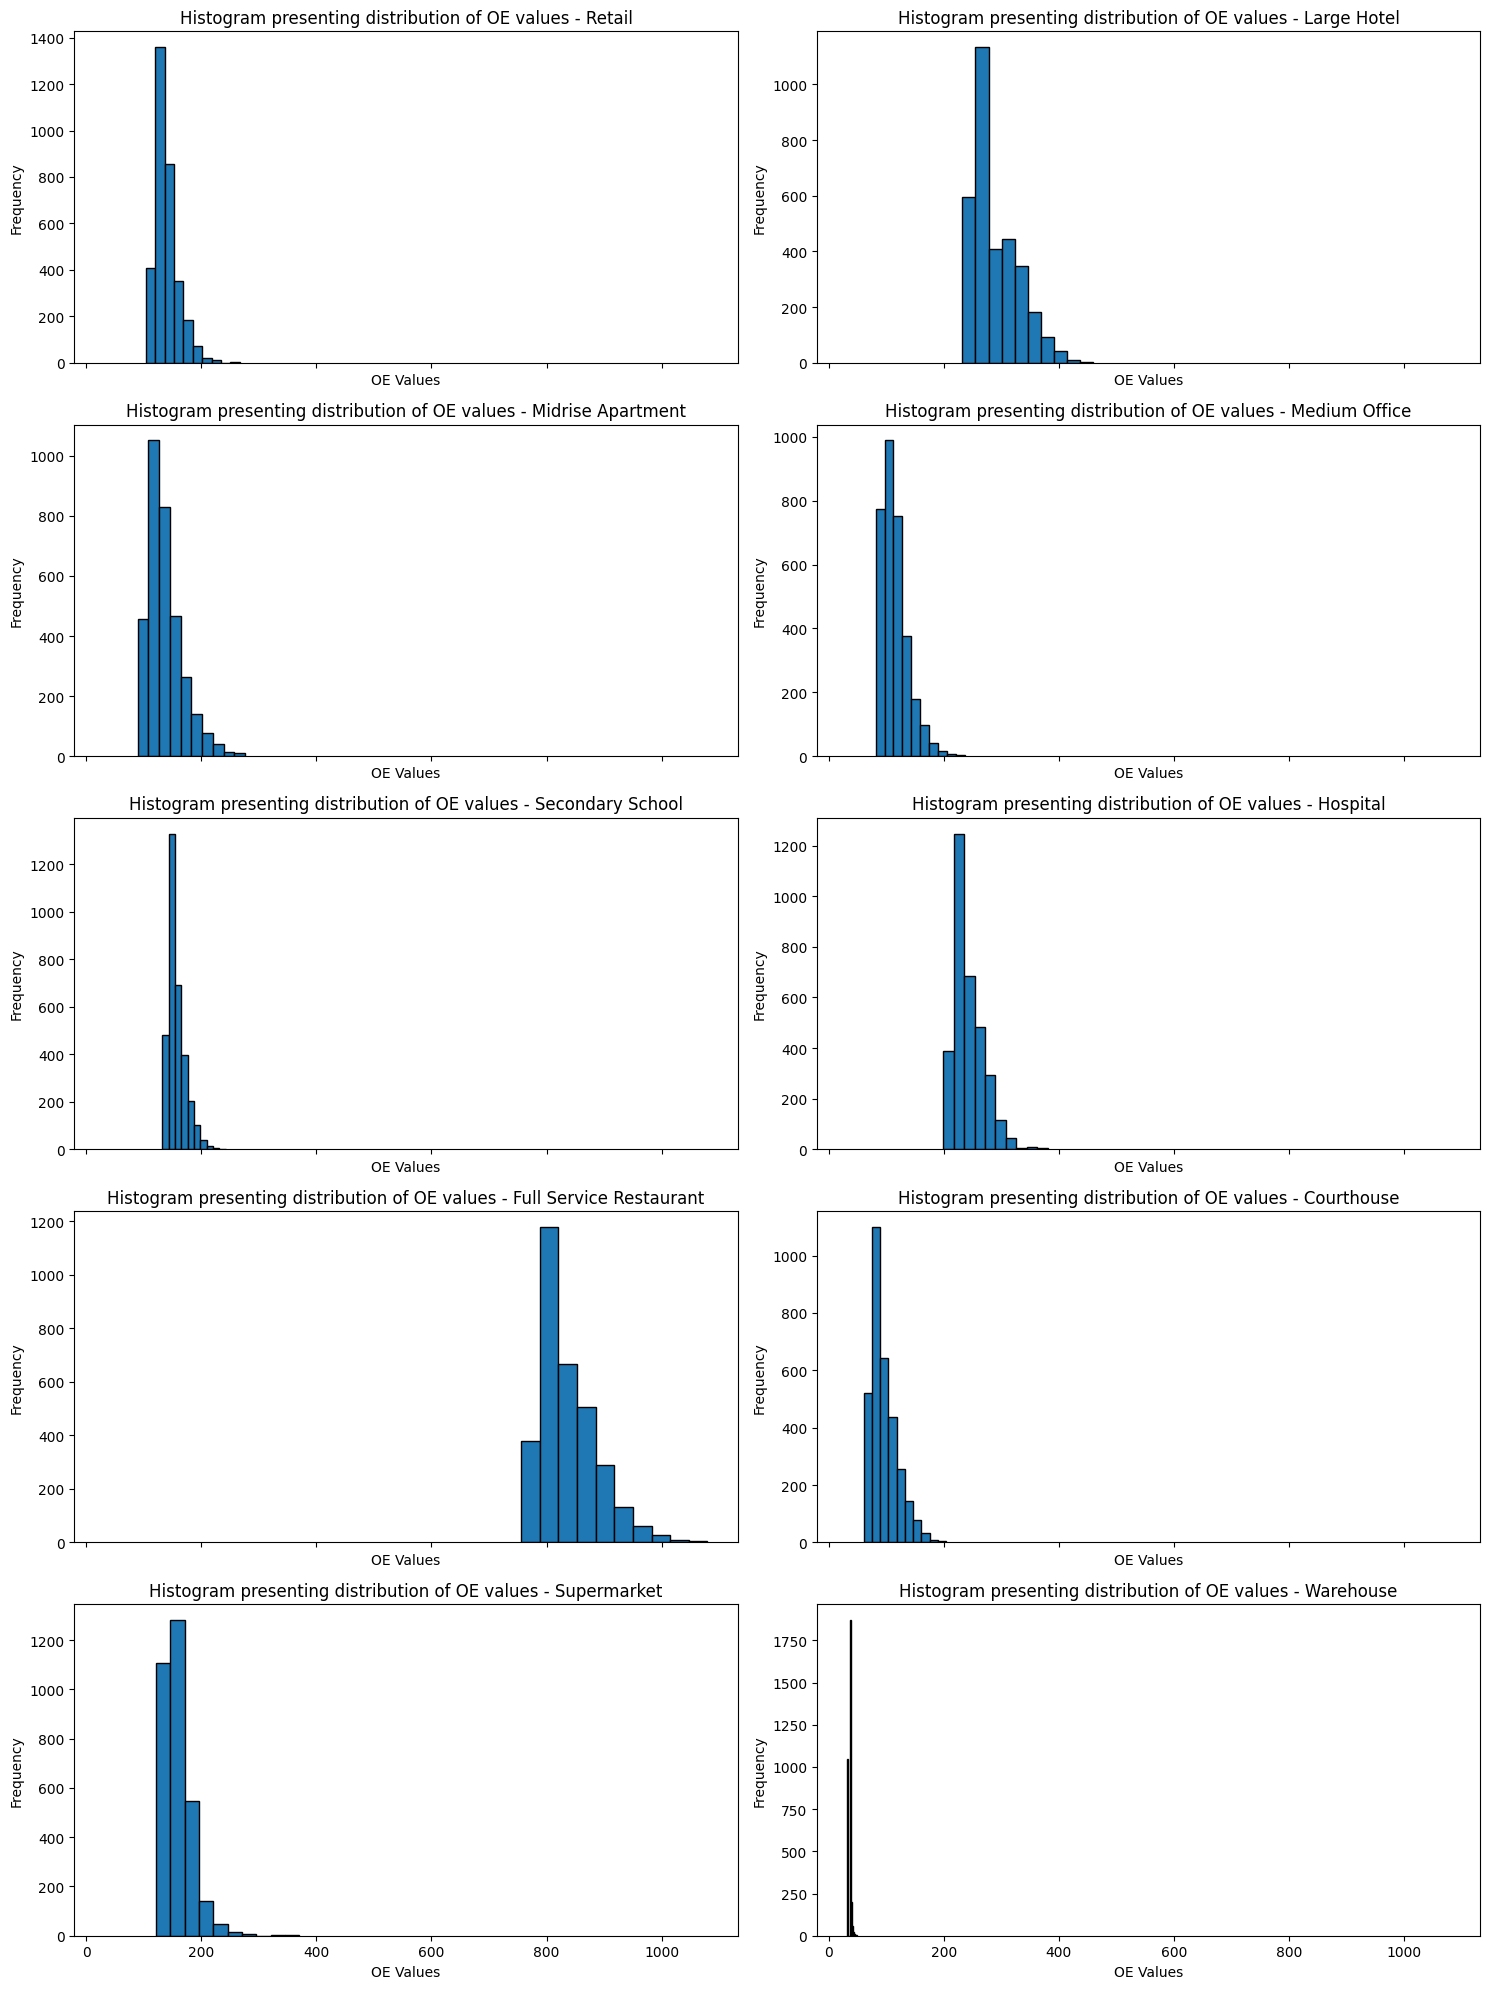

In [40]:
#Distribution of OE values per program type
program_values = df_sel_du["program"].unique()
fig, axes = plt.subplots(5, 2, figsize=(15, 20), sharex=True, sharey=False)
axes = axes.flatten()

for i, program_value in enumerate(program_values):
    program_data = df_sel_du[df_sel_du["program"] == program_value]

    axes[i].hist(program_data['OE'], bins=10, edgecolor='black', label=f' {program_names[program_value]}')
    axes[i].set_title(f'Histogram presenting distribution of OE values - {program_names[program_value]}')
    axes[i].set_xlabel('OE Values')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

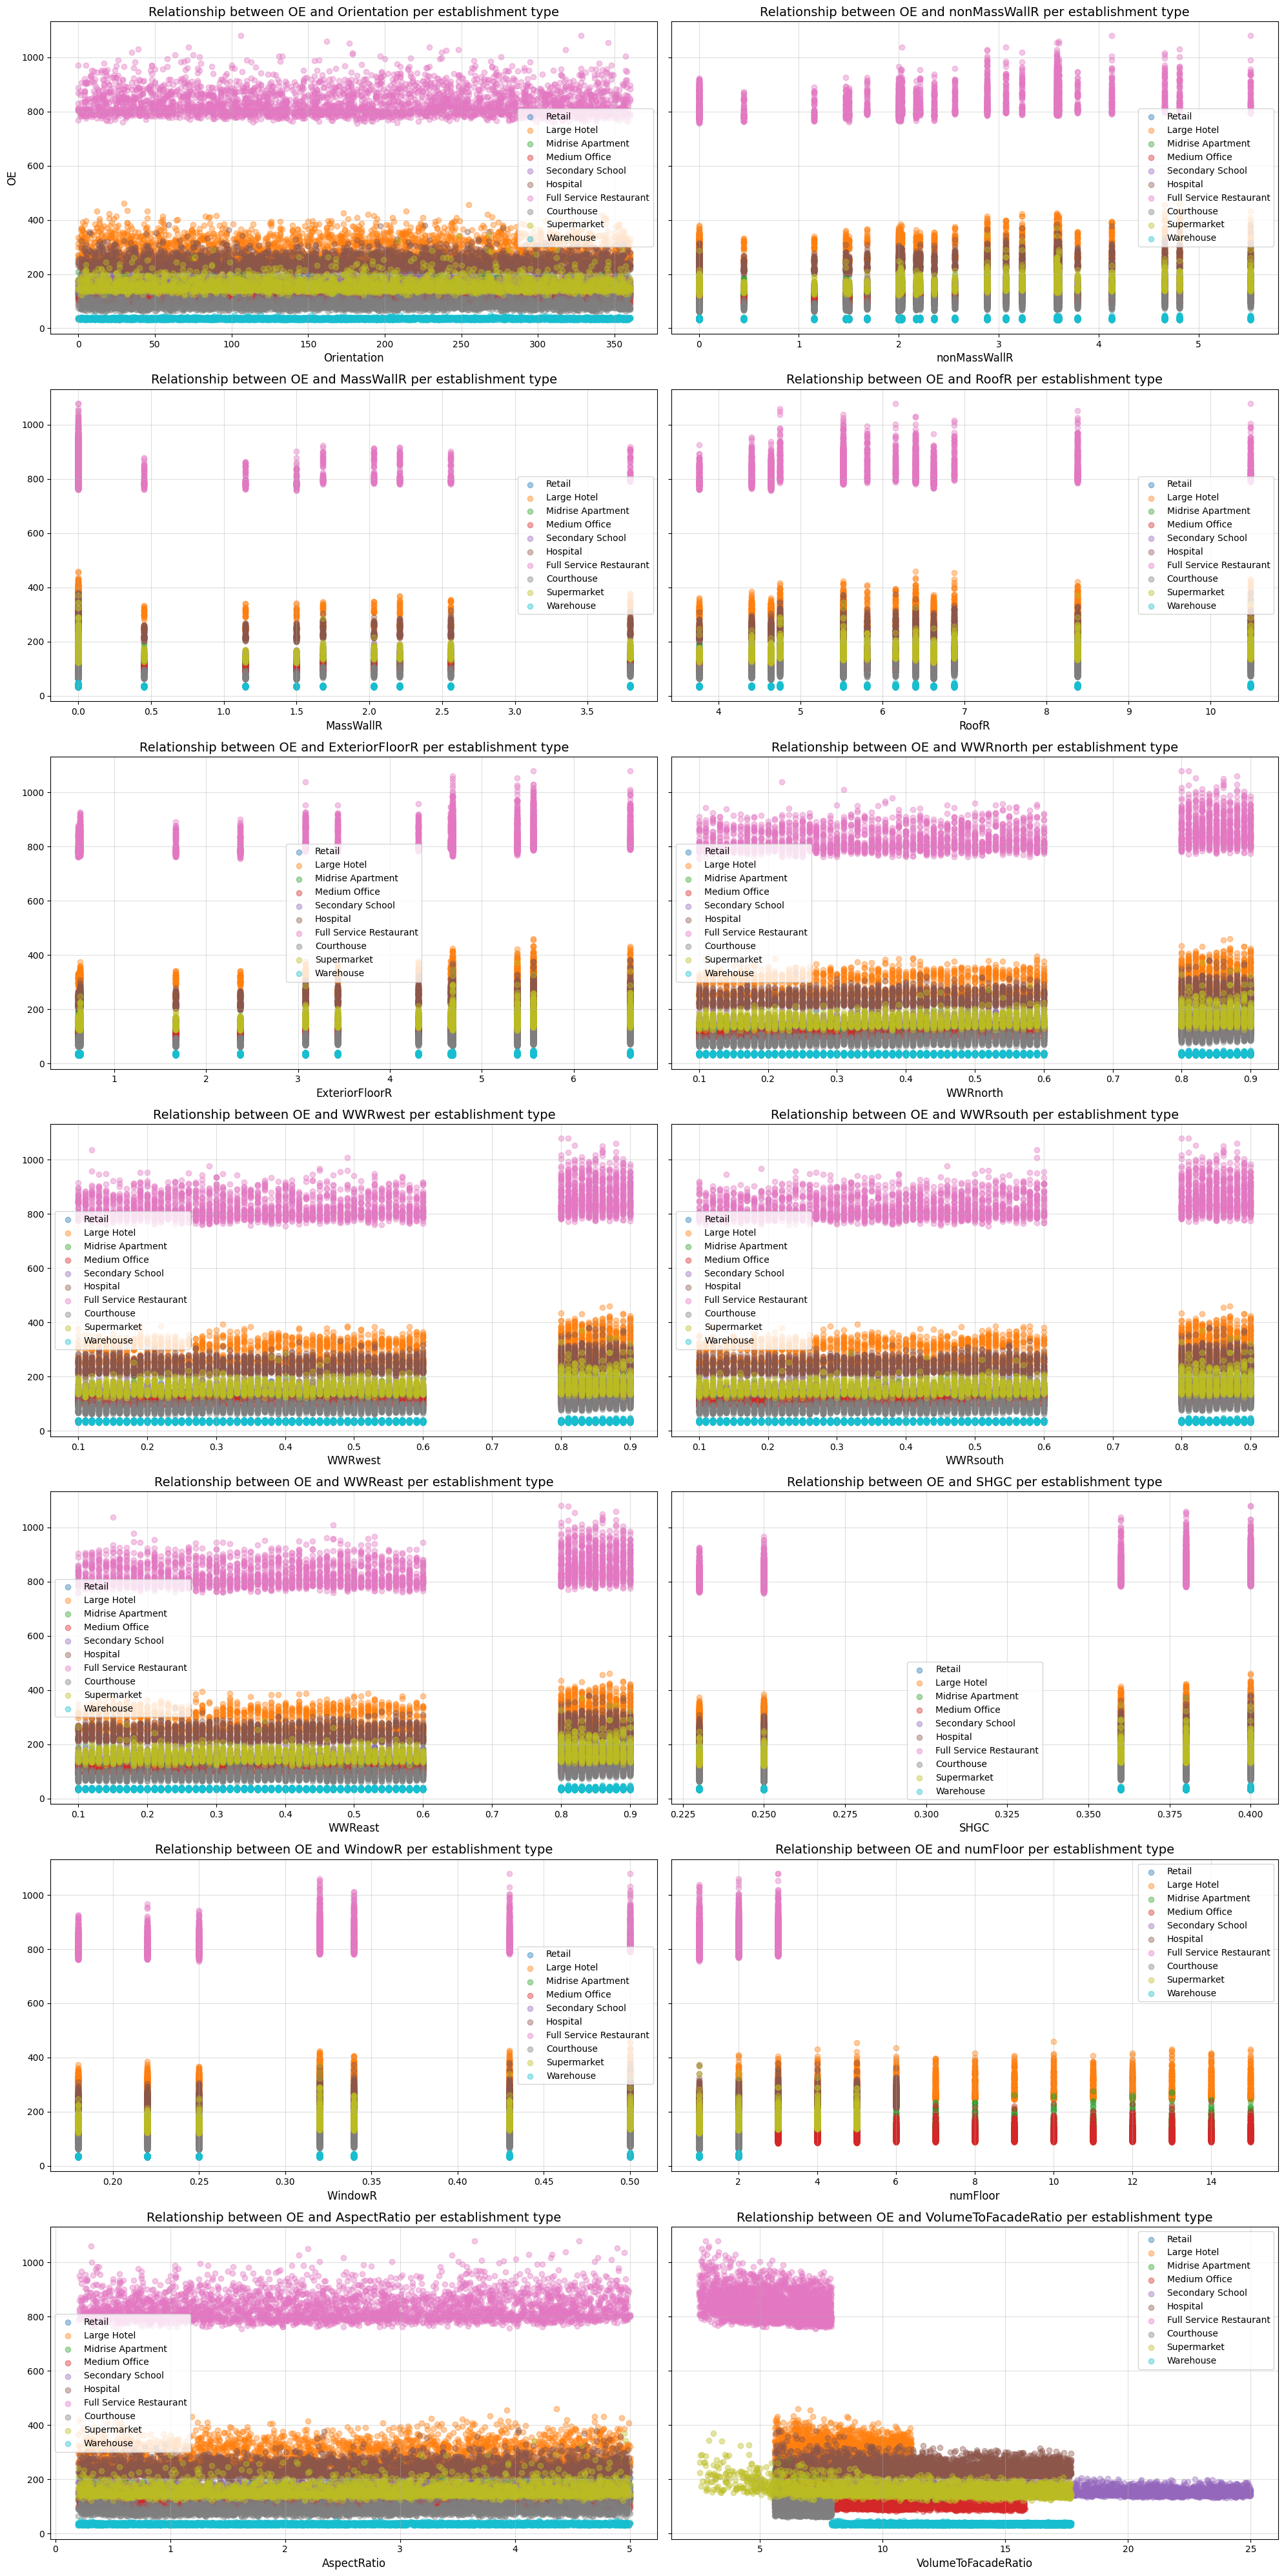

In [41]:
#Relationship between OE and each variable per establishment type
fig, axes = plt.subplots(7, 2, sharey=True, figsize=(20, 40))
titles = ["Orientation", "nonMassWallR", "MassWallR", "RoofR" , "ExteriorFloorR", "WWRnorth", "WWRwest", "WWRsouth", "WWReast", "SHGC", "WindowR", "numFloor", "AspectRatio", "VolumeToFacadeRatio"]
xlabels = ["Orientation", "nonMassWallR", "MassWallR", "RoofR", "ExteriorFloorR", "WWRnorth", "WWRwest", "WWRsouth", "WWReast", "SHGC", "WindowR ", "numFloor", "AspectRatio", "VolumeToFacadeRatio"]
cont_cols = ["Orientation", "nonMassWallR [m^2-K/W]", "MassWallR [m^2-K/W]", "RoofR [m^2-K/W]",  "ExteriorFloorR [m^2-K/W]", "WWRnorth", "WWRwest", "WWRsouth", "WWReast", "SHGC", "WindowR [m^2-K/W]", "numFloor", "AspectRatio", "VolumeToFacadeRatio"]
fontsize = 14

# Create a list of unique program values for coloring and legend
program_values = df_sel_du["program"].unique()

for i, (ax, col, title, xlabel) in enumerate(
        zip(axes.flatten(), cont_cols, titles, xlabels)
):
    # Plot each program separately
    for program_value in program_values:
        # Select data for the current program
        program_data = df_sel_du[df_sel_du["program"] == program_value]

        # Scatter plot with color and label
        ax.scatter(program_data[col], program_data["OE"], alpha=0.4, label=program_names[program_value])

    ax.set_title(f"Relationship between OE and {title} per establishment type", fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize - 2)
    ax.set_ylabel("OE" if i == 0 else None, fontsize=fontsize - 2)
    ax.grid(":", alpha=0.4)
    ax.legend()  # Add legend for each subplot

plt.tight_layout()
plt.show()

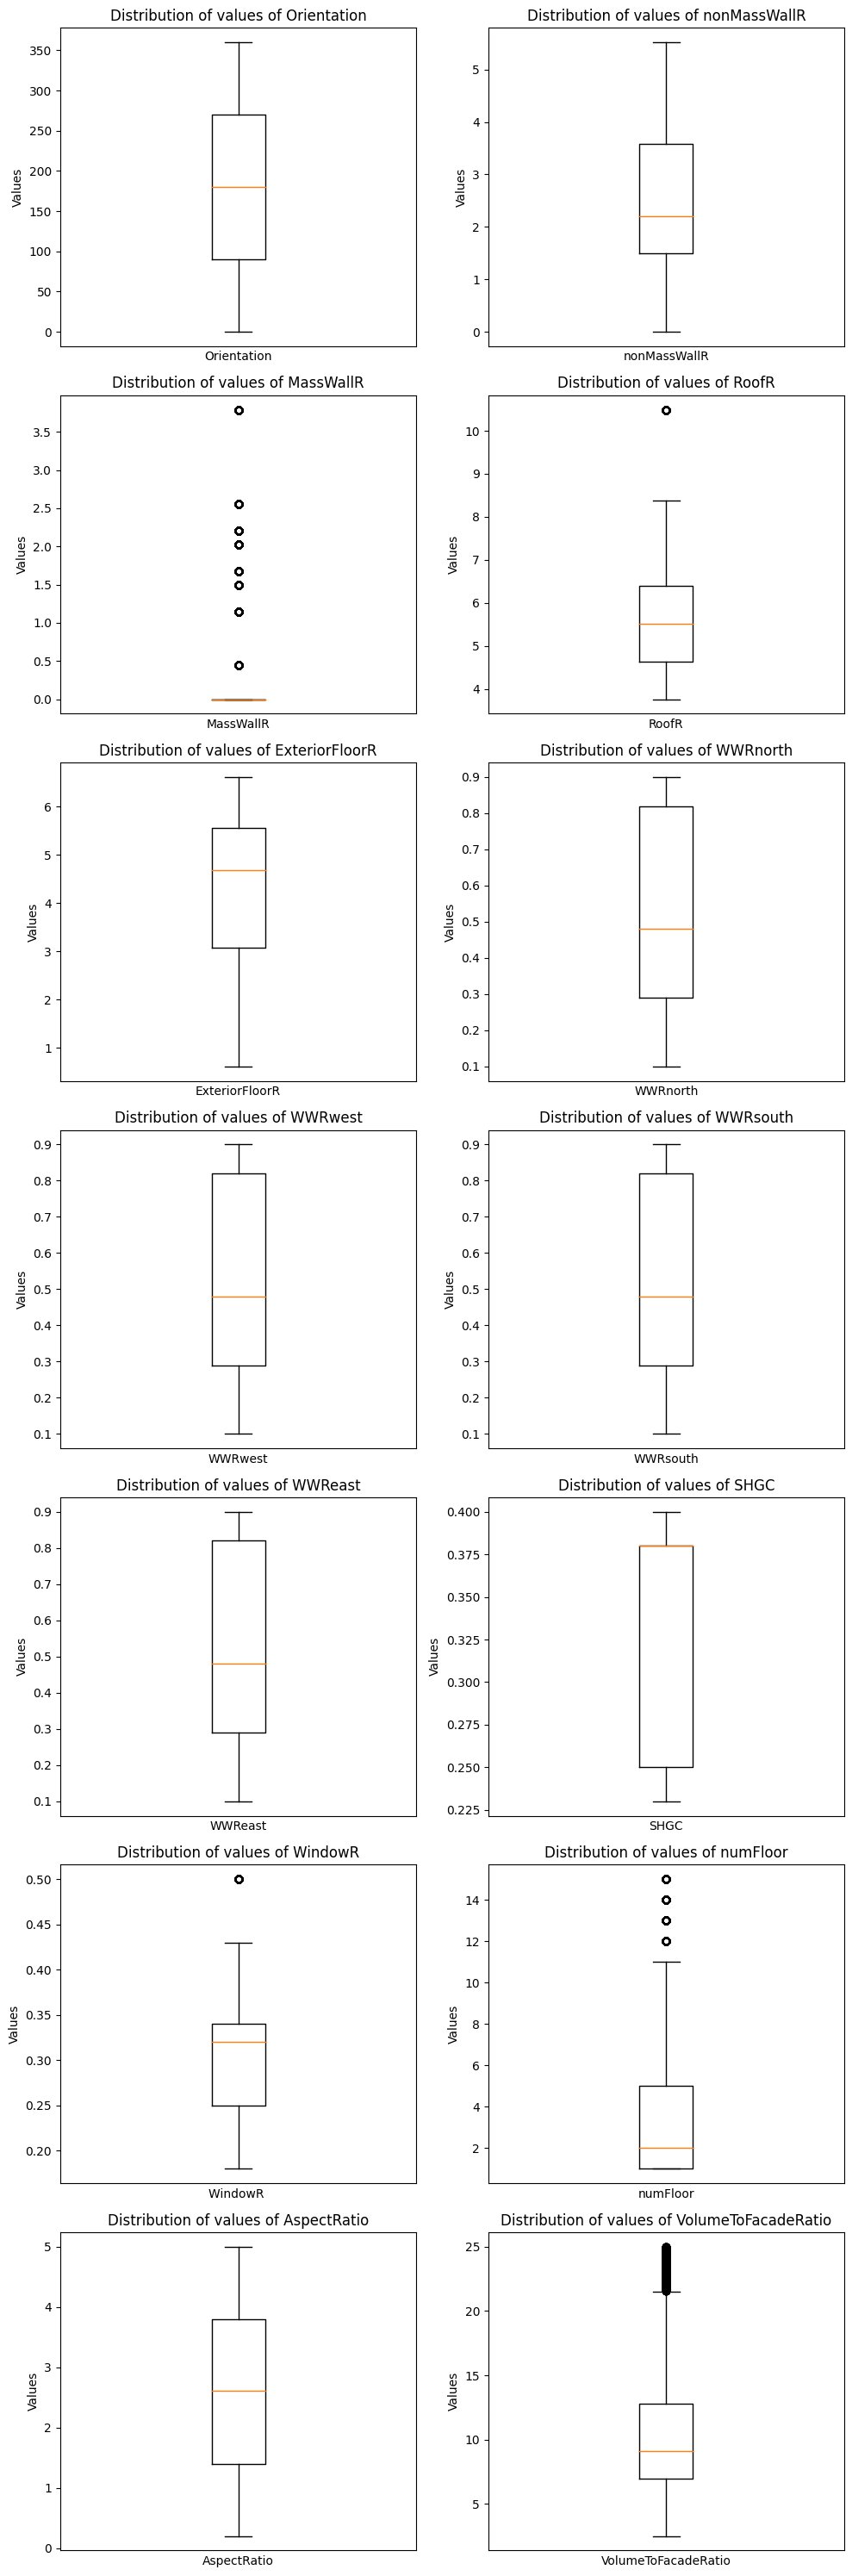

In [42]:
# Box plots of each variables' values to identify outliers
plt.figure(figsize=(10, 30))

for i, (col, title, xlabel) in enumerate(zip(cont_cols, titles, xlabels), start=1):
    plt.subplot(7, 2, i)
    plt.boxplot(df_sel_du[col])
    plt.title(f'Distribution of values of {title}')
    plt.xlabel(xlabel)
    plt.ylabel('Values')
    plt.xticks([])

plt.tight_layout()
plt.show()

In [43]:
#Categorical variables
cat_cols = ["program", "WallType", "Equipment"]

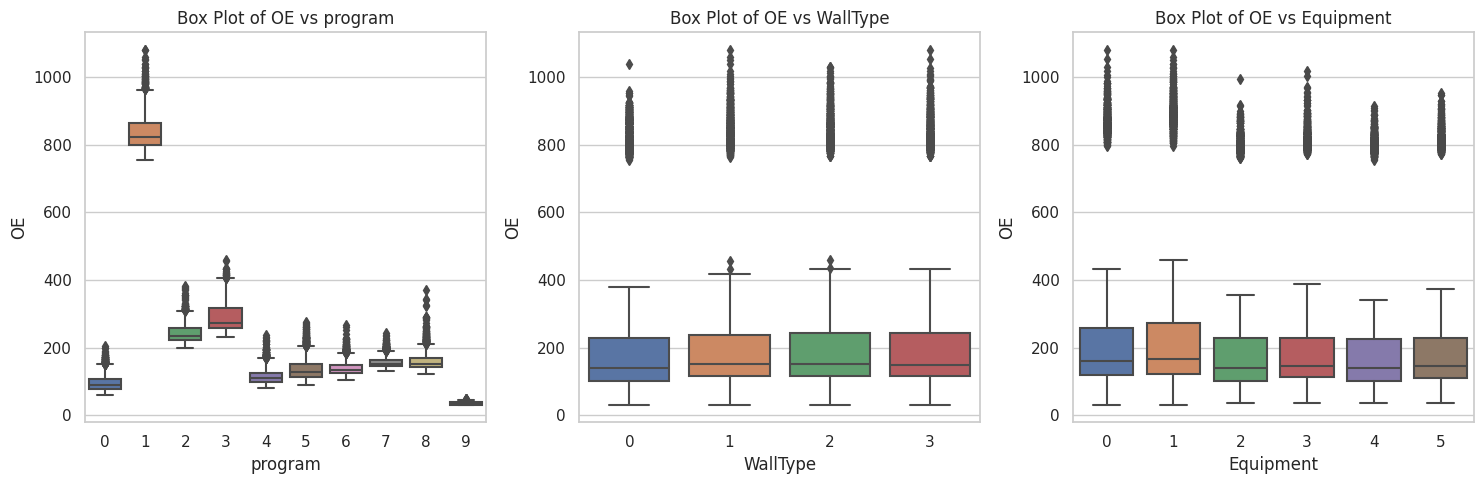

In [44]:
#Explore the distribuion of categorical variables with respect to OE
sns.set(style="whitegrid")

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(15, 5))

# Loop through each categorical variable and create a box plot
for i, cat_col in enumerate(cat_cols):
    sns.boxplot(x=cat_col, y="OE", data=df_sel_du, ax=axes[i])
    axes[i].set_title(f'Box Plot of OE vs {cat_col}')

plt.tight_layout()
plt.show()

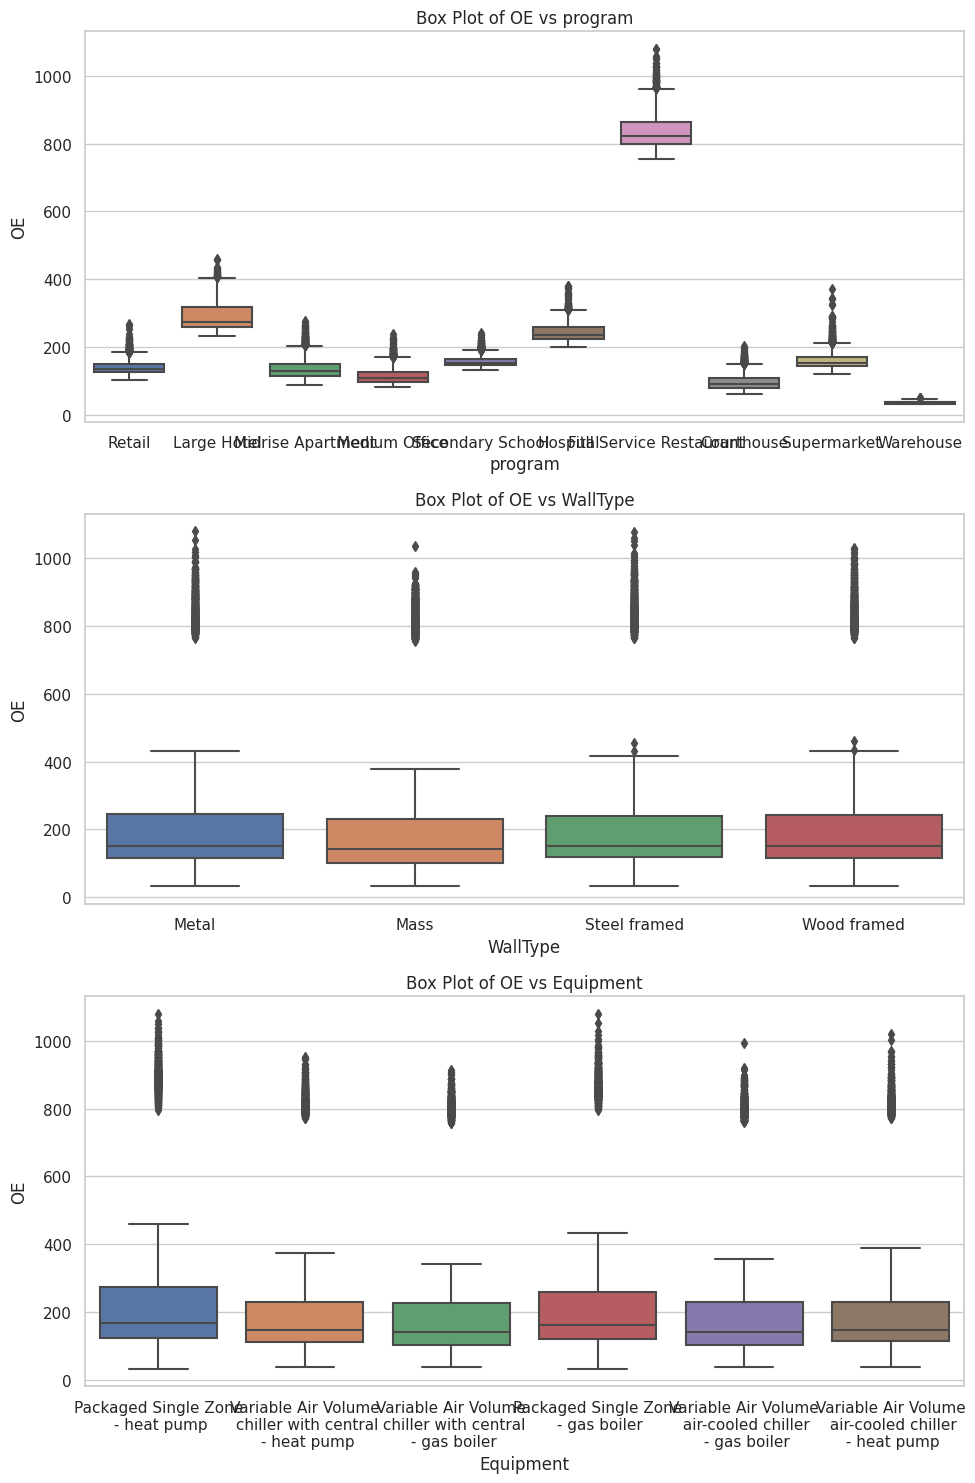

In [45]:
df_sel_du["program"] = df_sel_du["program"].map(program_names)
df_sel_du["WallType"] = df_sel_du["WallType"].map(wall_names)
df_sel_du["Equipment"] = df_sel_du["Equipment"].map(equip_names)

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Loop through each categorical variable and create a box plot
for i, cat_col in enumerate(cat_cols):
    sns.boxplot(x=cat_col, y="OE", data=df_sel_du, ax=axes[i])
    axes[i].set_title(f'Box Plot of OE vs {cat_col}')

plt.tight_layout()
plt.show()

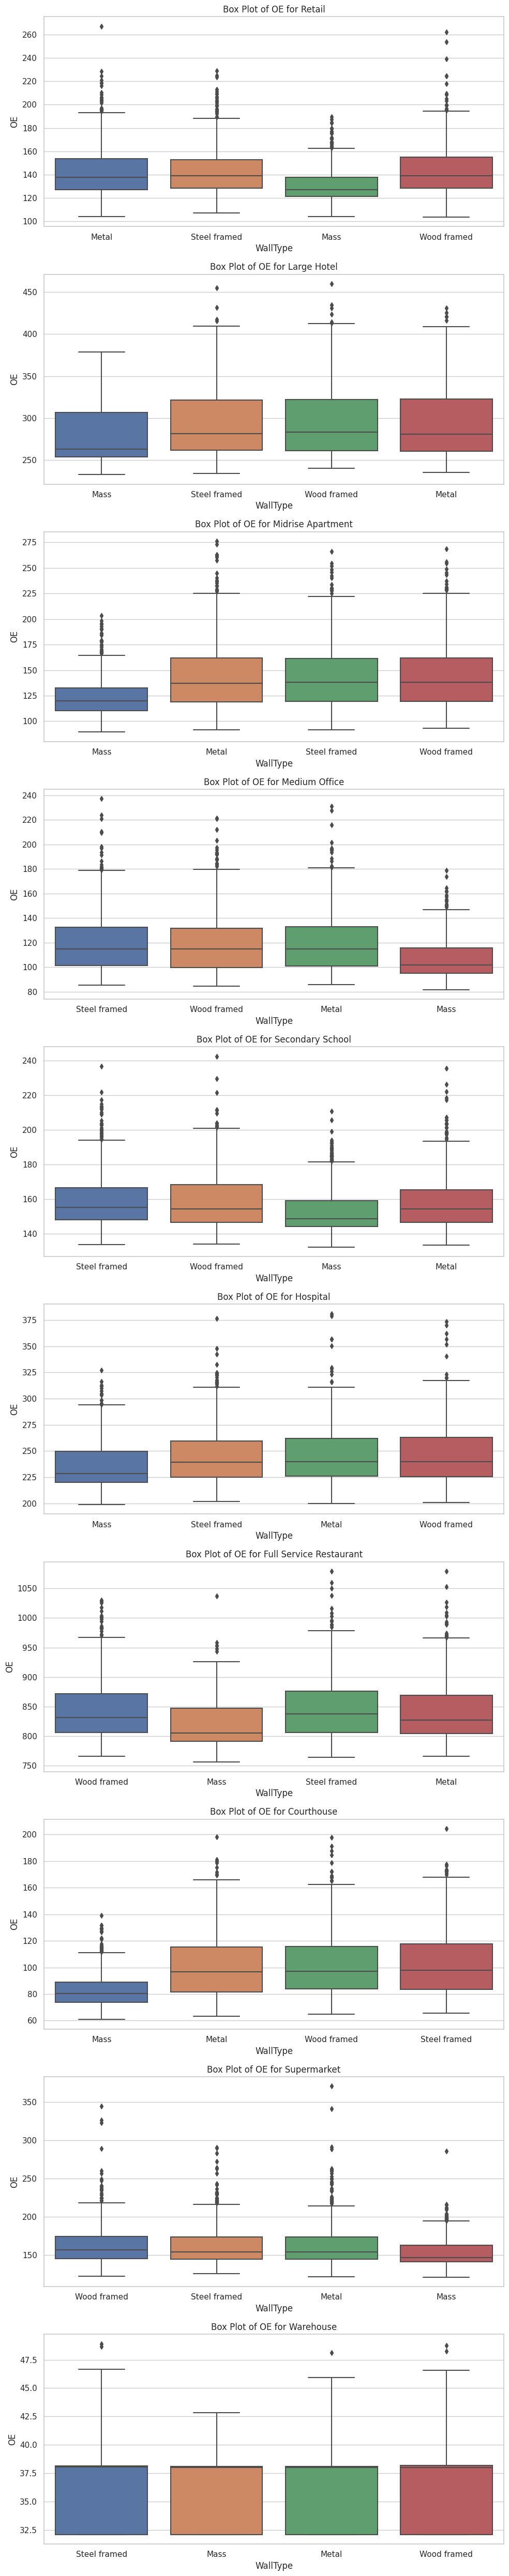

In [46]:
cat_cols = ["program", "WallType"]

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots for each program
fig, axes = plt.subplots(nrows=len(df_sel_du["program"].unique()), ncols=1, figsize=(10, 5 * len(df_sel_du["program"].unique())))

# Loop through each program and create a box plot for each WallType
for i, program_value in enumerate(df_sel_du["program"].unique()):
    program_data = df_sel_du[df_sel_du["program"] == program_value]
    sns.boxplot(x="WallType", y="OE", data=program_data, ax=axes[i])
    axes[i].set_title(f'Box Plot of OE for {program_value}')

plt.tight_layout()
plt.show()

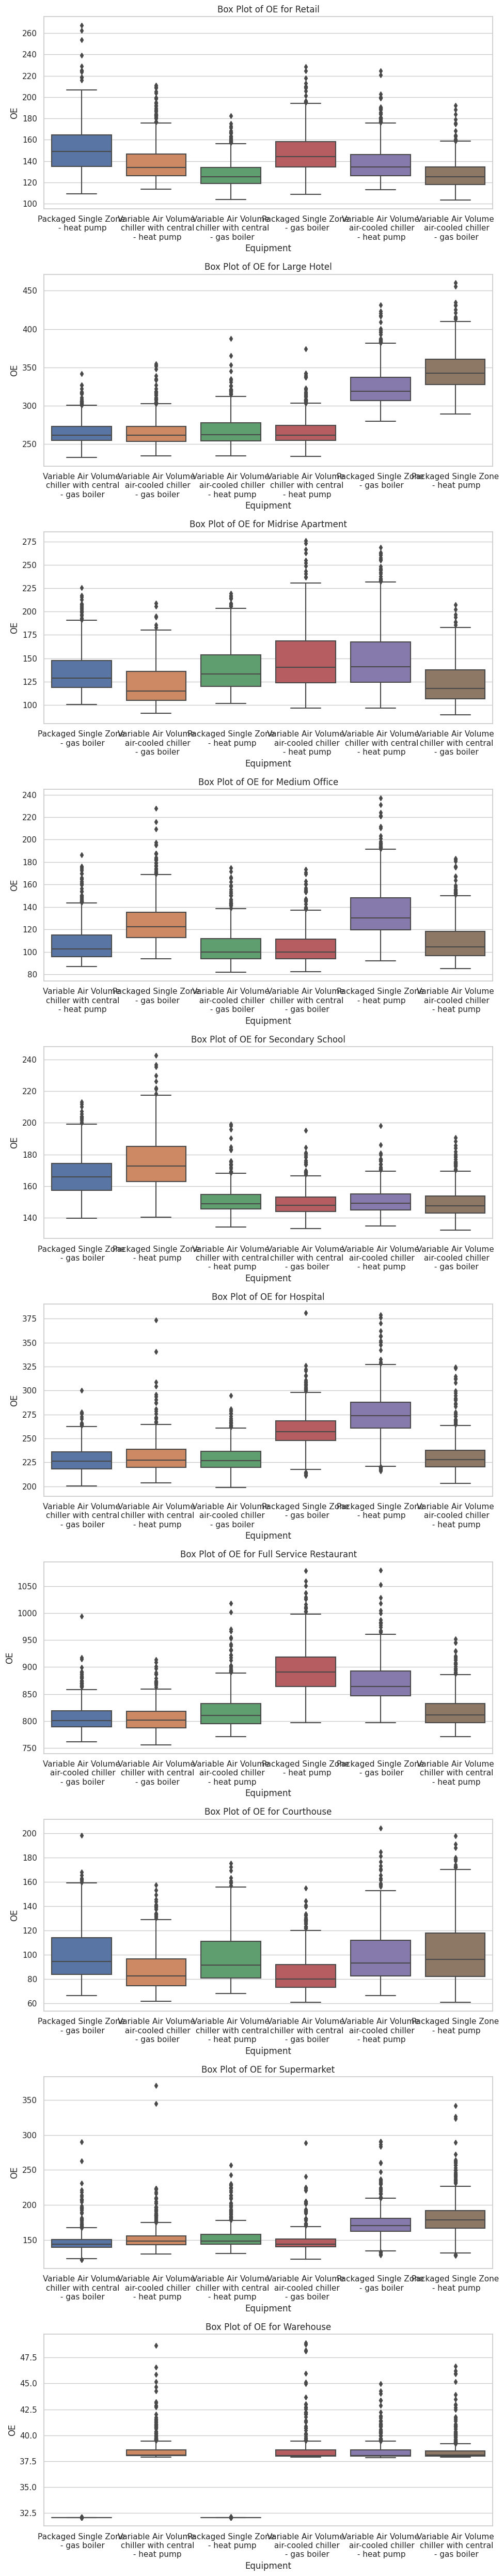

In [47]:
cat_cols = ["program", "Equipment"]

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots for each program
fig, axes = plt.subplots(nrows=len(df_sel_du["program"].unique()), ncols=1, figsize=(10, 5 * len(df_sel_du["program"].unique())))

# Loop through each program and create a box plot for each WallType
for i, program_value in enumerate(df_sel_du["program"].unique()):
    program_data = df_sel_du[df_sel_du["program"] == program_value]
    sns.boxplot(x="Equipment", y="OE", data=program_data, ax=axes[i])
    axes[i].set_title(f'Box Plot of OE for {program_value}')

plt.tight_layout()
plt.show()

<br>
<hr>
<br>
<h1>Data Analysis PART 2</h1>
<br>
<hr>

In [48]:
pred = pd.read_csv('https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/predictors.csv')
resp = pd.read_csv('https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/response.csv')

In [49]:
pred.describe()

Unnamed: 0   Orientation  nonMassWallR [m^2-K/W]  \
count  32500.000000  32500.000000            32500.000000   
mean   16249.500000    179.894585                2.384207   
std     9382.086211    104.237783                1.472428   
min        0.000000      0.000000                0.000000   
25%     8124.750000     90.000000                1.500000   
50%    16249.500000    180.000000                2.210000   
75%    24374.250000    270.000000                3.580000   
max    32499.000000    360.000000                5.520000   

       MassWallR [m^2-K/W]  RoofR [m^2-K/W]  InteriorFloorR [m^2-K/W]  \
count         32500.000000     32500.000000              3.250000e+04   
mean              0.321344         5.930260              7.000000e-01   
std               0.814431         1.614038              1.110240e-16   
min               0.000000         3.760000              7.000000e-01   
25%               0.000000         4.640000              7.000000e-01   
50%               0.000000         5.520000              7.000000e-01   
75%               0.000000         6.400000              7.000000e-01   
max               3.790000        10.490000              7.000000e-01   

       ExteriorFloorR [m^2-K/W]      WWRnorth       WWRwest      WWRsouth  \
count              32500.000000  32500.000000  32500.000000  32500.000000   
mean                   4.133882      0.516276      0.516068      0.516250   
std                    1.772313      0.264802      0.264985      0.264917   
min                    0.610000      0.100000      0.100000      0.100000   
25%                    3.080000      0.290000      0.290000      0.290000   
50%                    4.680000      0.480000      0.480000      0.480000   
75%                    5.560000      0.820000      0.820000      0.820000   
max                    6.610000      0.900000      0.900000      0.900000   

       ...     program_4     program_5     program_6     program_7  \
count  ...  32500.000000  32500.000000  32500.000000  32500.000000   
mean   ...      0.099569      0.102954      0.100431      0.100338   
std    ...      0.299429      0.303903      0.300578      0.300455   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

          program_8     program_9    WallType_0    WallType_1    WallType_2  \
count  32500.000000  32500.000000  32500.000000  32500.000000  32500.000000   
mean       0.097077      0.099108      0.333169      0.222492      0.222215   
std        0.296067      0.298811      0.471354      0.415926      0.415742   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         WallType_3  
count  32500.000000  
mean       0.222123  
std        0.415680  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 36 columns]

In [50]:
resp.describe()

Unnamed: 0            OE
count  32500.000000  32500.000000
mean   16249.500000    221.072443
std     9382.086211    217.904817
min        0.000000     32.083522
25%     8124.750000    111.055418
50%    16249.500000    147.225634
75%    24374.250000    237.394306
max    32499.000000   1079.253552

In [51]:
#InteriorFloorR is the same throughout the entire dataset (suggests a non-insulated floor type construction, which yields the same value across the entire data), so we drop this variable as it will not be useful nor helpful in our predictions
pred = pred.drop('InteriorFloorR [m^2-K/W]', axis=1)

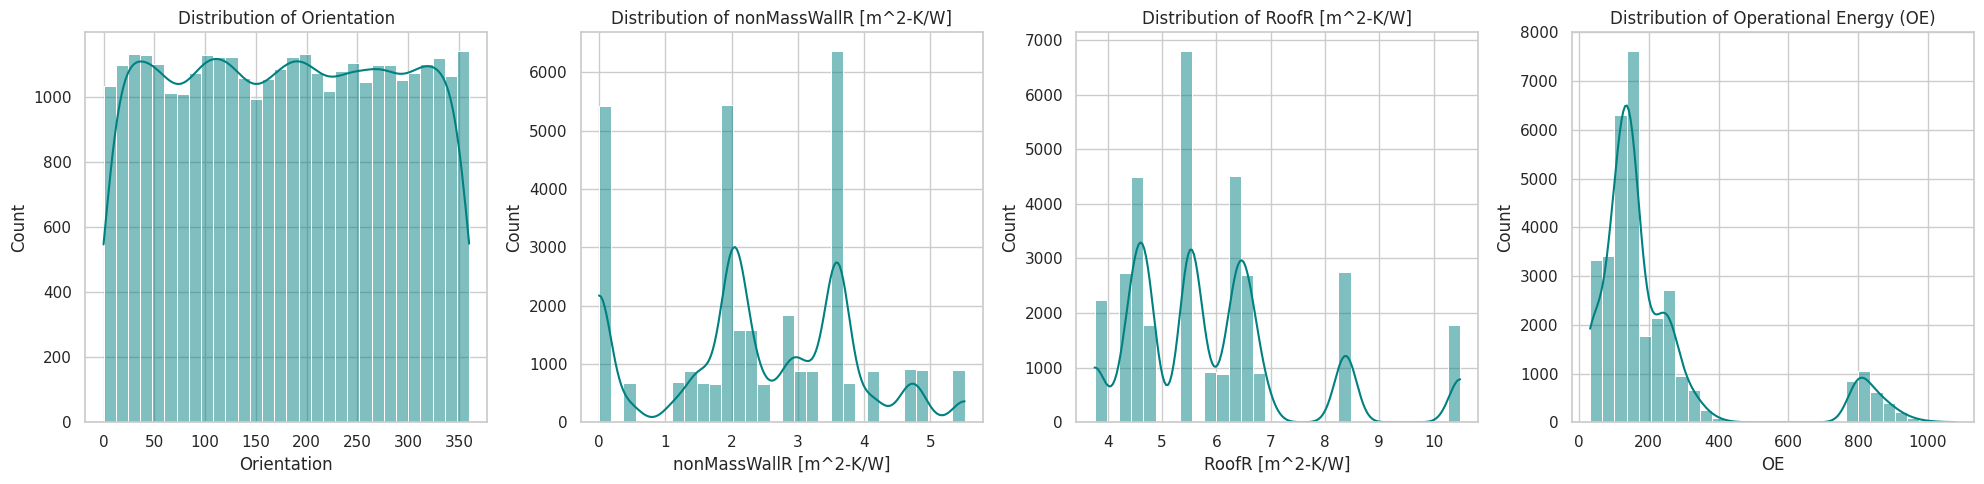

In [52]:
plt.figure(figsize=(20, 5))

# Histogram of 'Orientation'
plt.subplot(1, 4, 1)
sns.histplot(pred['Orientation'], bins=30, kde=True, color="teal")
plt.title('Distribution of Orientation')

# Histogram of 'nonMassWallR [m^2-K/W]'
plt.subplot(1, 4, 2)
sns.histplot(pred['nonMassWallR [m^2-K/W]'], bins=30, kde=True, color="teal")
plt.title('Distribution of nonMassWallR [m^2-K/W]')

# Histogram of 'RoofR [m^2-K/W]'
plt.subplot(1, 4, 3)
sns.histplot(pred['RoofR [m^2-K/W]'], bins=30, kde=True, color="teal")
plt.title('Distribution of RoofR [m^2-K/W]')

# Histogram of 'OE' (response variable)
plt.subplot(1, 4, 4)
sns.histplot(resp['OE'], bins=30, kde=True, color="teal")
plt.title('Distribution of Operational Energy (OE)')


plt.tight_layout()
plt.show()

The summary statistics for the predictors reveal a variety of scales and distributions. For instance, the orientation seems uniformly distributed between 0 and 360 degrees, non-mass wall R-values range between 0 and 5.5, and roof R-values range between 3.76 and 10.49. The response variable, operational energy (OE), has a mean of approximately 221 with a wide standard deviation of about 217, indicating significant variation in energy consumption across the dataset.

The histograms for selected predictors and the operational energy suggest the following:

The Orientation histogram is approximately uniform, suggesting no particular orientation bias in the dataset.
nonMassWallR is non-uniform, with varying frequency of values
RoofR shows a slight right skew.
The operational energy distribution is right-skewed, with a few values significantly higher than the rest, which could be potential outliers or simply represent high-energy-consuming buildings.

In [53]:
full_data = pd.concat([pred, resp], axis=1)

In [54]:
#using a copy to retain the full_data intact just in case
fd_copy = full_data.copy()

In [55]:
#Labeling one-hot-encoded variables
program_names = {
    'program_0': "Courthouse",
    'program_1': "Full Service Restaurant",
    'program_2': "Hospital",
    'program_3': "Large Hotel",
    'program_4': "Medium Office",
    'program_5': "Midrise Apartment",
    'program_6': "Retail",
    'program_7': "Secondary School",
    'program_8': "Supermarket",
    'program_9': "Warehouse",
}

wall_names = {
    'WallType_0': "Mass",
    'WallType_1': "Steel framed",
    'WallType_2': "Wood framed",
    'WallType_3': "Metal",
}

equip_names = {
    'Equipment_0': "Packaged Single Zone - gas boiler",
    'Equipment_1': "Packaged Single Zone - heat pump",
    'Equipment_2': "Variable Air Volume air-cooled chiller - gas boiler",
    'Equipment_3': "Variable Air Volume air-cooled chiller - heat pump",
    'Equipment_4': "Variable Air Volume chiller with central - gas boiler",
    'Equipment_5': "Variable Air Volume chiller with central - heat pump",
}

In [56]:
fd_copy.rename(columns=program_names, inplace=True)
fd_copy.rename(columns=wall_names, inplace=True)
fd_copy.rename(columns=equip_names, inplace=True)

In [57]:
fd_copy = fd_copy.drop(columns=['Unnamed: 0'])
fd_copy.head(5)

Orientation  nonMassWallR [m^2-K/W]  MassWallR [m^2-K/W]  RoofR [m^2-K/W]  \
0          348                    2.88                 0.00             8.38   
1           96                    3.58                 0.00            10.49   
2          182                    2.21                 0.00             5.52   
3          359                    0.00                 2.03             5.52   
4          317                    2.02                 0.00             4.40   

   ExteriorFloorR [m^2-K/W]  WWRnorth  WWRwest  WWRsouth  WWReast  SHGC  ...  \
0                      5.38      0.23     0.11      0.58     0.15  0.36  ...   
1                      6.61      0.32     0.24      0.28     0.48  0.40  ...   
2                      3.43      0.38     0.37      0.56     0.13  0.38  ...   
3                      3.08      0.42     0.38      0.37     0.49  0.38  ...   
4                      4.68      0.90     0.90      0.90     0.90  0.25  ...   

   Midrise Apartment  Retail  Secondary School  Supermarket  Warehouse  Mass  \
0                  0       1                 0            0          0     0   
1                  0       1                 0            0          0     0   
2                  0       0                 0            0          0     1   
3                  1       0                 0            0          0     1   
4                  0       0                 0            0          0     0   

   Steel framed  Wood framed  Metal          OE  
0             0            0      1  141.615293  
1             0            0      1  127.674846  
2             0            0      0  255.768779  
3             0            0      0  126.355396  
4             1            0      0  124.733609  

[5 rows x 35 columns]

In [58]:
all_renames = {**program_names, **wall_names, **equip_names}
categorical_columns = list(all_renames.values())
categorical_columns

['Courthouse',
 'Full Service Restaurant',
 'Hospital',
 'Large Hotel',
 'Medium Office',
 'Midrise Apartment',
 'Retail',
 'Secondary School',
 'Supermarket',
 'Warehouse',
 'Mass',
 'Steel framed',
 'Wood framed',
 'Metal',
 'Packaged Single Zone - gas boiler',
 'Packaged Single Zone - heat pump',
 'Variable Air Volume air-cooled chiller - gas boiler',
 'Variable Air Volume air-cooled chiller - heat pump',
 'Variable Air Volume chiller with central - gas boiler',
 'Variable Air Volume chiller with central - heat pump']

In [59]:
numerical_columns = [col for col in fd_copy if col not in categorical_columns and col != 'OE']
numerical_columns

['Orientation',
 'nonMassWallR [m^2-K/W]',
 'MassWallR [m^2-K/W]',
 'RoofR [m^2-K/W]',
 'ExteriorFloorR [m^2-K/W]',
 'WWRnorth',
 'WWRwest',
 'WWRsouth',
 'WWReast',
 'SHGC',
 'WindowR [m^2-K/W]',
 'numFloor',
 'AspectRatio',
 'VolumeToFacadeRatio']

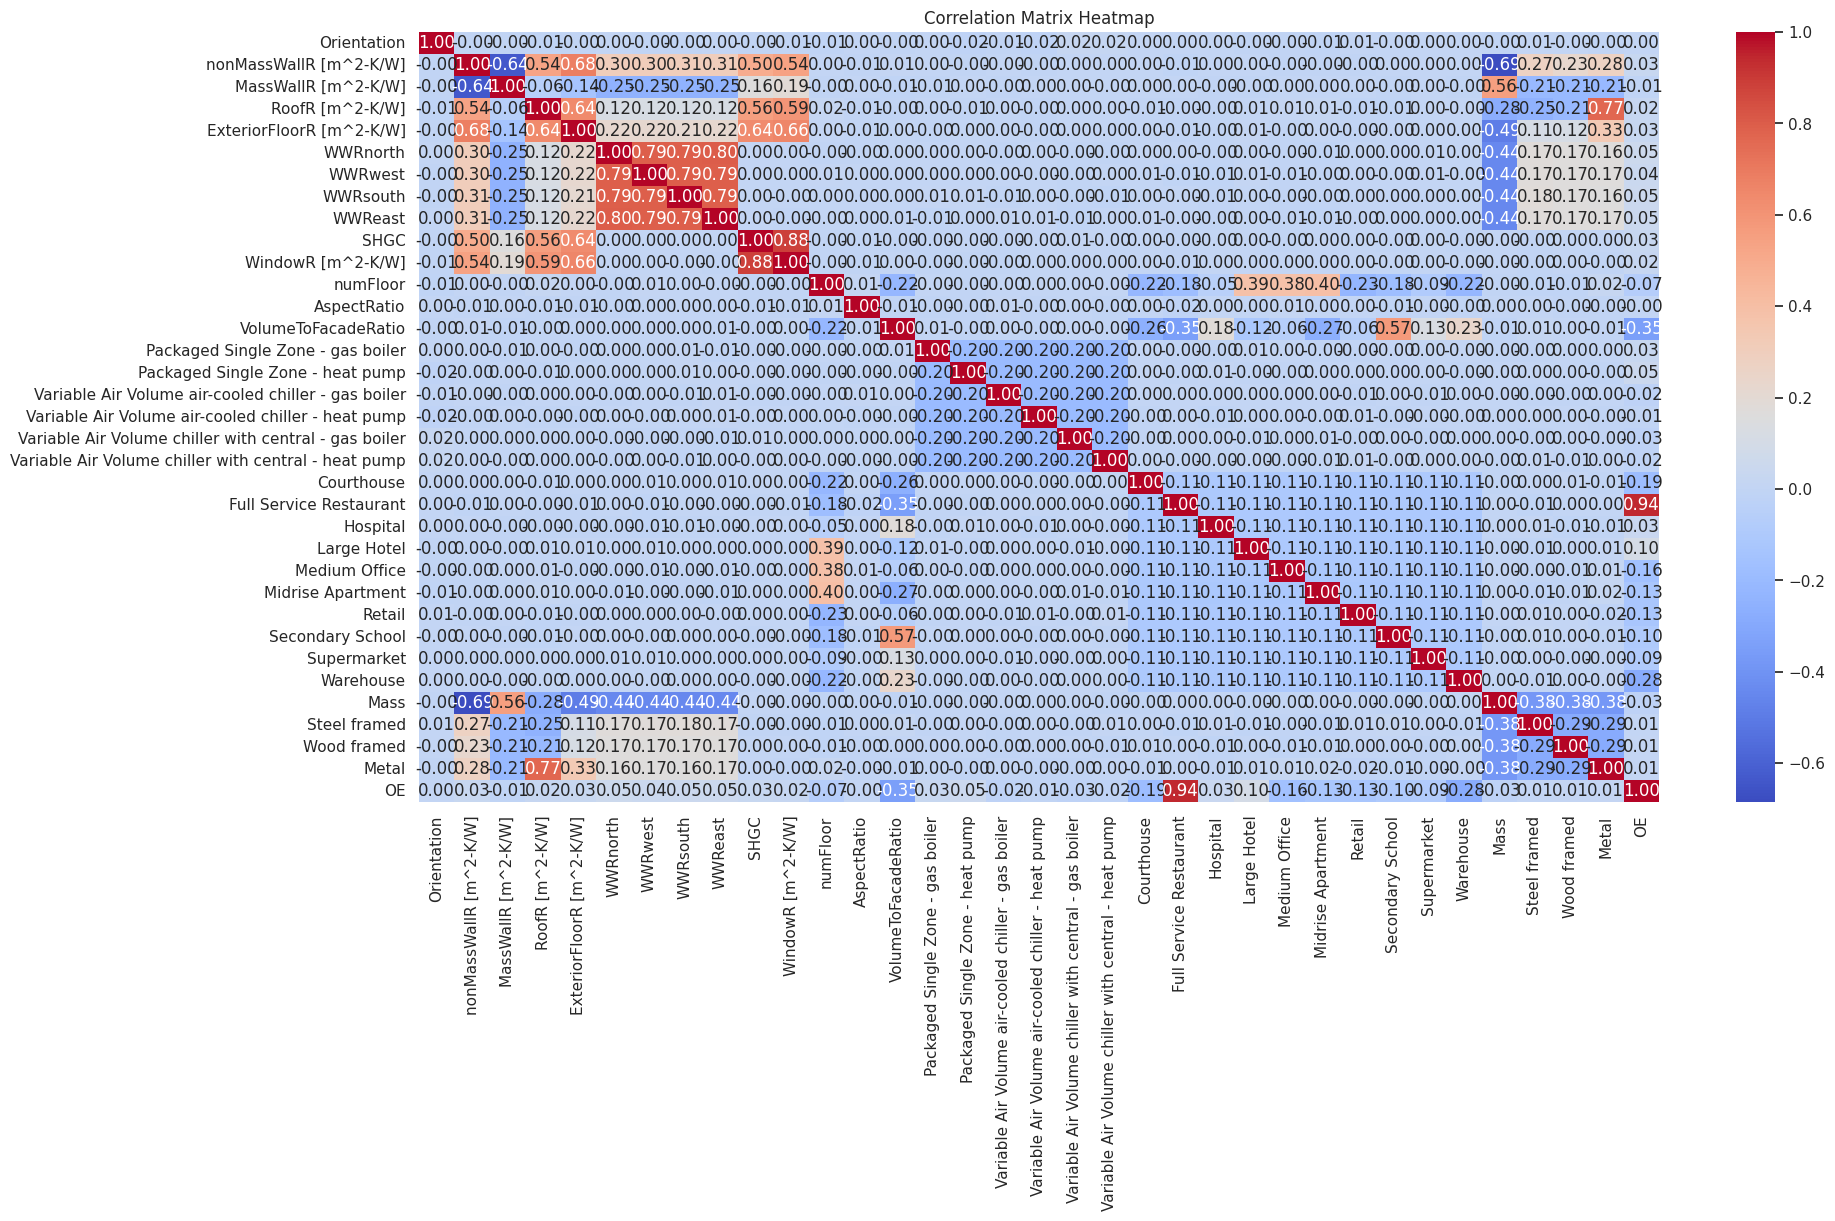

In [60]:
correlation_matrix = fd_copy.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [61]:
correlation_matrix

Orientation  \
Orientation                                            1.000000   
nonMassWallR [m^2-K/W]                                -0.001330   
MassWallR [m^2-K/W]                                   -0.002765   
RoofR [m^2-K/W]                                       -0.007299   
ExteriorFloorR [m^2-K/W]                              -0.003567   
WWRnorth                                               0.001848   
WWRwest                                               -0.002675   
WWRsouth                                              -0.002532   
WWReast                                                0.001611   
SHGC                                                  -0.004784   
WindowR [m^2-K/W]                                     -0.005502   
numFloor                                              -0.008281   
AspectRatio                                            0.001722   
VolumeToFacadeRatio                                   -0.001369   
Packaged Single Zone - gas boiler                      0.001974   
Packaged Single Zone - heat pump                      -0.017144   
Variable Air Volume air-cooled chiller - gas bo...    -0.006349   
Variable Air Volume air-cooled chiller - heat pump    -0.015555   
Variable Air Volume chiller with central - gas ...     0.019822   
Variable Air Volume chiller with central - heat...     0.017182   
Courthouse                                             0.001234   
Full Service Restaurant                                0.002769   
Hospital                                               0.001095   
Large Hotel                                           -0.001309   
Medium Office                                         -0.001021   
Midrise Apartment                                     -0.010475   
Retail                                                 0.005451   
Secondary School                                      -0.000301   
Supermarket                                            0.001061   
Warehouse                                              0.001641   
Mass                                                  -0.000796   
Steel framed                                           0.005265   
Wood framed                                           -0.000616   
Metal                                                 -0.003749   
OE                                                     0.000017   

                                                    nonMassWallR [m^2-K/W]  \
Orientation                                                      -0.001330   
nonMassWallR [m^2-K/W]                                            1.000000   
MassWallR [m^2-K/W]                                              -0.638909   
RoofR [m^2-K/W]                                                   0.535895   
ExteriorFloorR [m^2-K/W]                                          0.679844   
WWRnorth                                                          0.303868   
WWRwest                                                           0.304751   
WWRsouth                                                          0.305721   
WWReast                                                           0.305787   
SHGC                                                              0.498685   
WindowR [m^2-K/W]                                                 0.539365   
numFloor                                                          0.000877   
AspectRatio                                                      -0.007289   
VolumeToFacadeRatio                                               0.010827   
Packaged Single Zone - gas boiler                                 0.002471   
Packaged Single Zone - heat pump                                 -0.002520   
Variable Air Volume air-cooled chiller - gas bo...               -0.000504   
Variable Air Volume air-cooled chiller - heat pump               -0.003396   
Variable Air Volume chiller with central - gas ...                0.001702   
Variable Air Volume chiller with central - heat...                0.002240   
C

<hr>
<hr>
A correlation matrix is made and visualized in a heat map using seaborn to show relationships and correlation coefficients between variables. In this process we are trying to identify which variables have strong relationship with each other.

In the visualization, most interesting aspect is the VolumeToFacadeRatio having a negative correlation with Operational Energy (OE) of -0.35, suggesting that buildings with high volume to facade ratio tend to have lower operational energy consumptions, holding all variables constant. This is interesting in the context of building technology, as one may often assume that larger buildings would consume more energy, but as we are holding all other variables constant, we need to look into how the other variables influence the output.
<hr>
<hr>
<br>

**Class Imbalances**

Refer the plot below:
The data acquired has no class imbalances, all programs, wall types and equipment are well balanced in terms of data count

In [62]:
#for counts
program_columns = [
    "Courthouse",
    "Full Service Restaurant",
    "Hospital",
    "Large Hotel",
    "Medium Office",
    "Midrise Apartment",
    "Retail",
    "Secondary School",
    "Supermarket",
    "Warehouse",
]

wall_columns = [
    "Mass",
    "Steel framed",
    "Wood framed",
    "Metal",
]

equip_columns = [
    "Packaged Single Zone - gas boiler",
    "Packaged Single Zone - heat pump",
    "Variable Air Volume air-cooled chiller - gas boiler",
    "Variable Air Volume air-cooled chiller - heat pump",
    "Variable Air Volume chiller with central - gas boiler",
    "Variable Air Volume chiller with central - heat pump",
]

equipment_counts = fd_copy[equip_columns].sum(axis=0)
program_counts = fd_copy[program_columns].sum(axis=0)
walltype_counts = fd_copy[wall_columns].sum(axis=0)

class_imbalances = {
    'Equipment': equipment_counts,
    'Program': program_counts,
    'WallType': walltype_counts
}

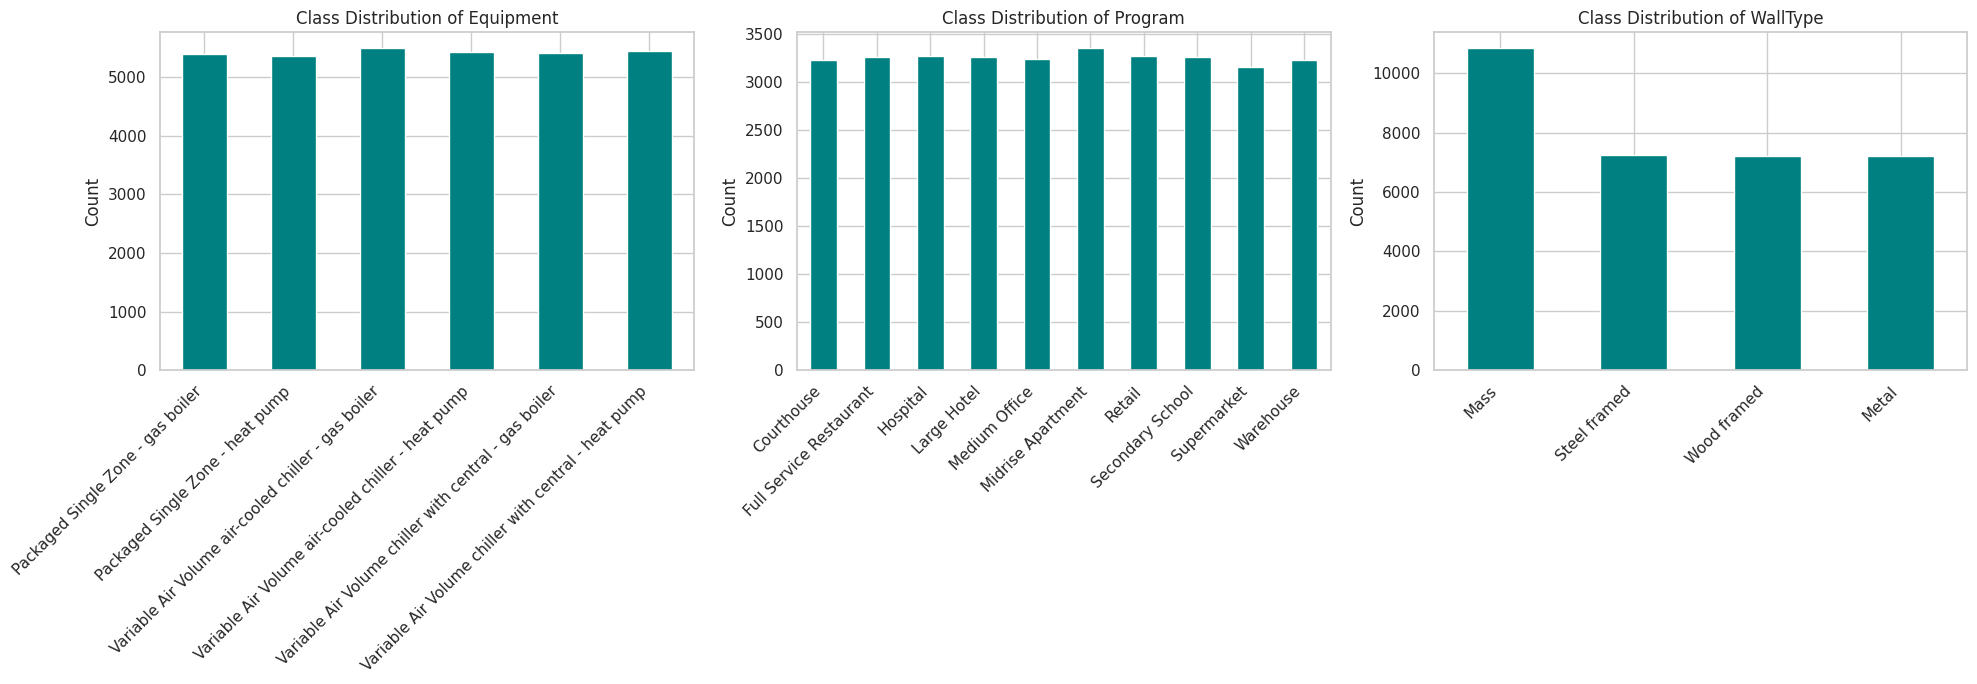

In [63]:
fig, axes = plt.subplots(1, len(class_imbalances), figsize=(20, 7))

for i, (column, counts) in enumerate(class_imbalances.items()):
    ax = axes[i] if len(class_imbalances) > 1 else axes
    counts.plot(kind='bar', ax=ax, color='teal')
    ax.set_title(f'Class Distribution of {column}')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Trend Analysis**

<p>The first plot below is the same plot as in PART 1, as an additional observation measure to cross-check<p>

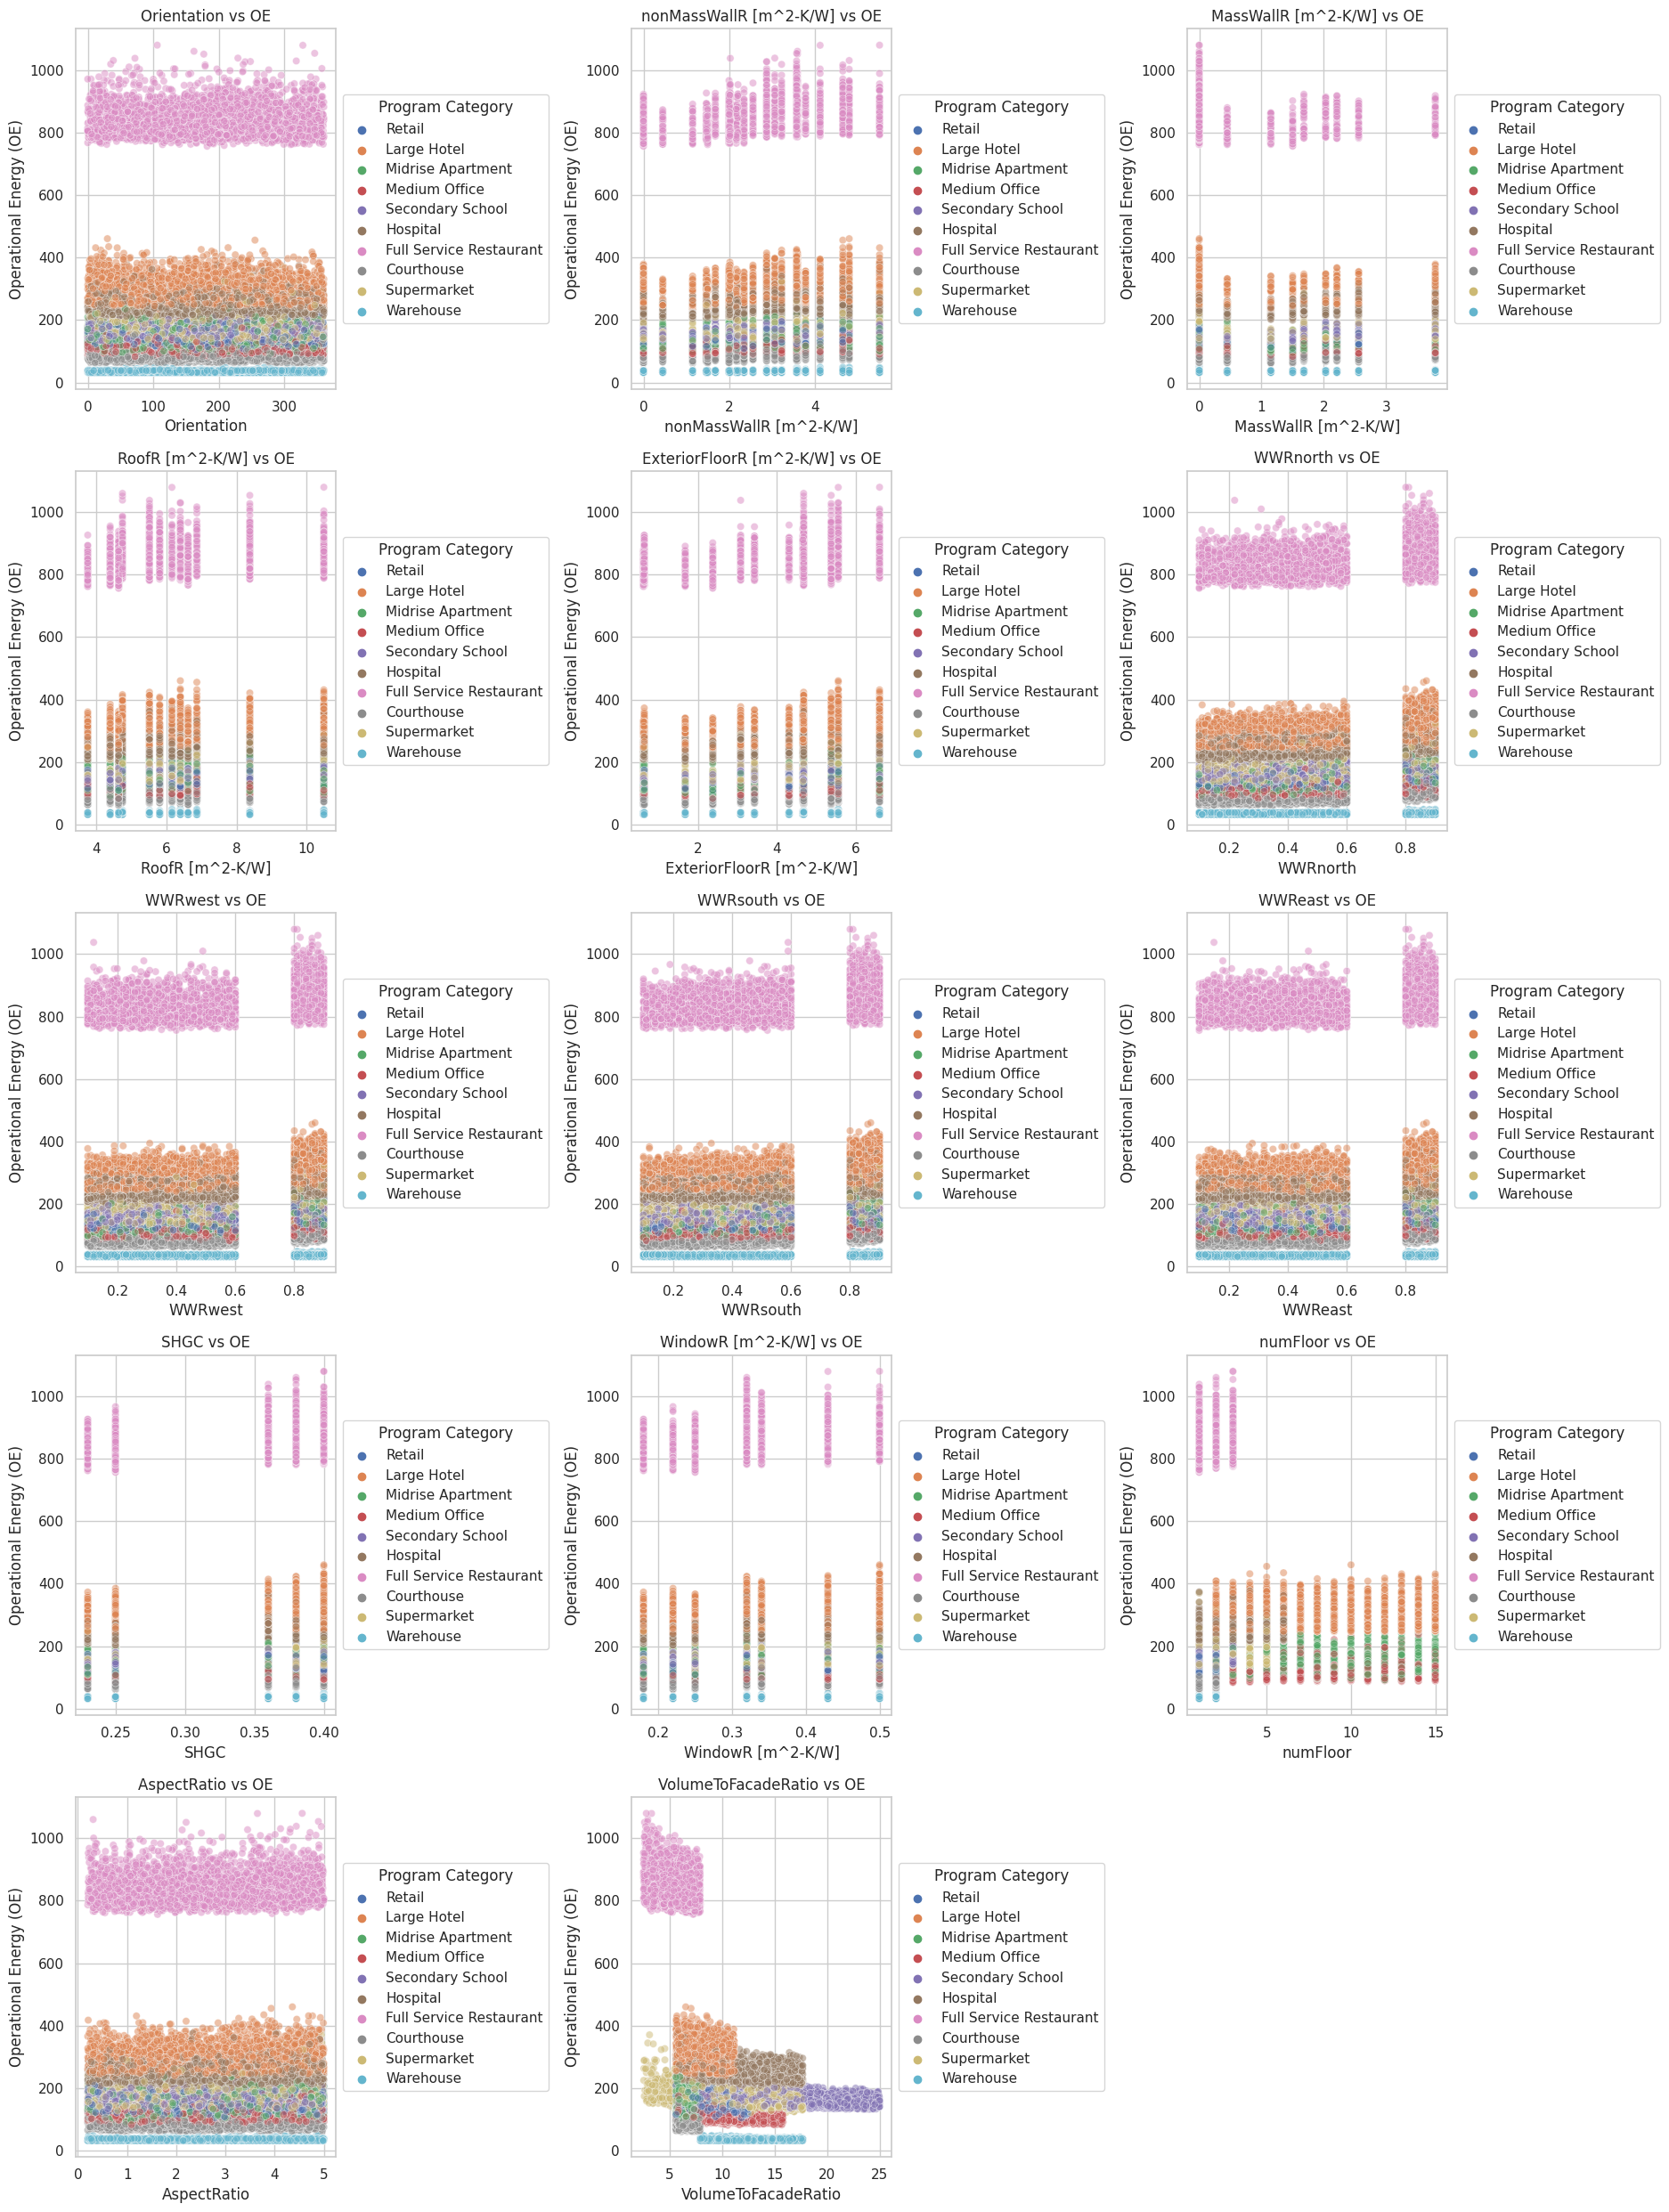

In [64]:
fd_copy['Program_Category'] = fd_copy[program_columns].idxmax(axis=1)

num_plots = len(numerical_columns)
cols = 3
rows = num_plots // cols + (num_plots % cols > 0)

plt.figure(figsize=(cols * 7, rows * 5))

for i, num_col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=fd_copy[num_col], y=fd_copy['OE'], hue=fd_copy['Program_Category'], alpha=0.5)
    plt.title(f'{num_col} vs OE')
    plt.xlabel(num_col)
    plt.ylabel('Operational Energy (OE)')

    #Moving the legend outside so all data is visible...
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Program Category')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

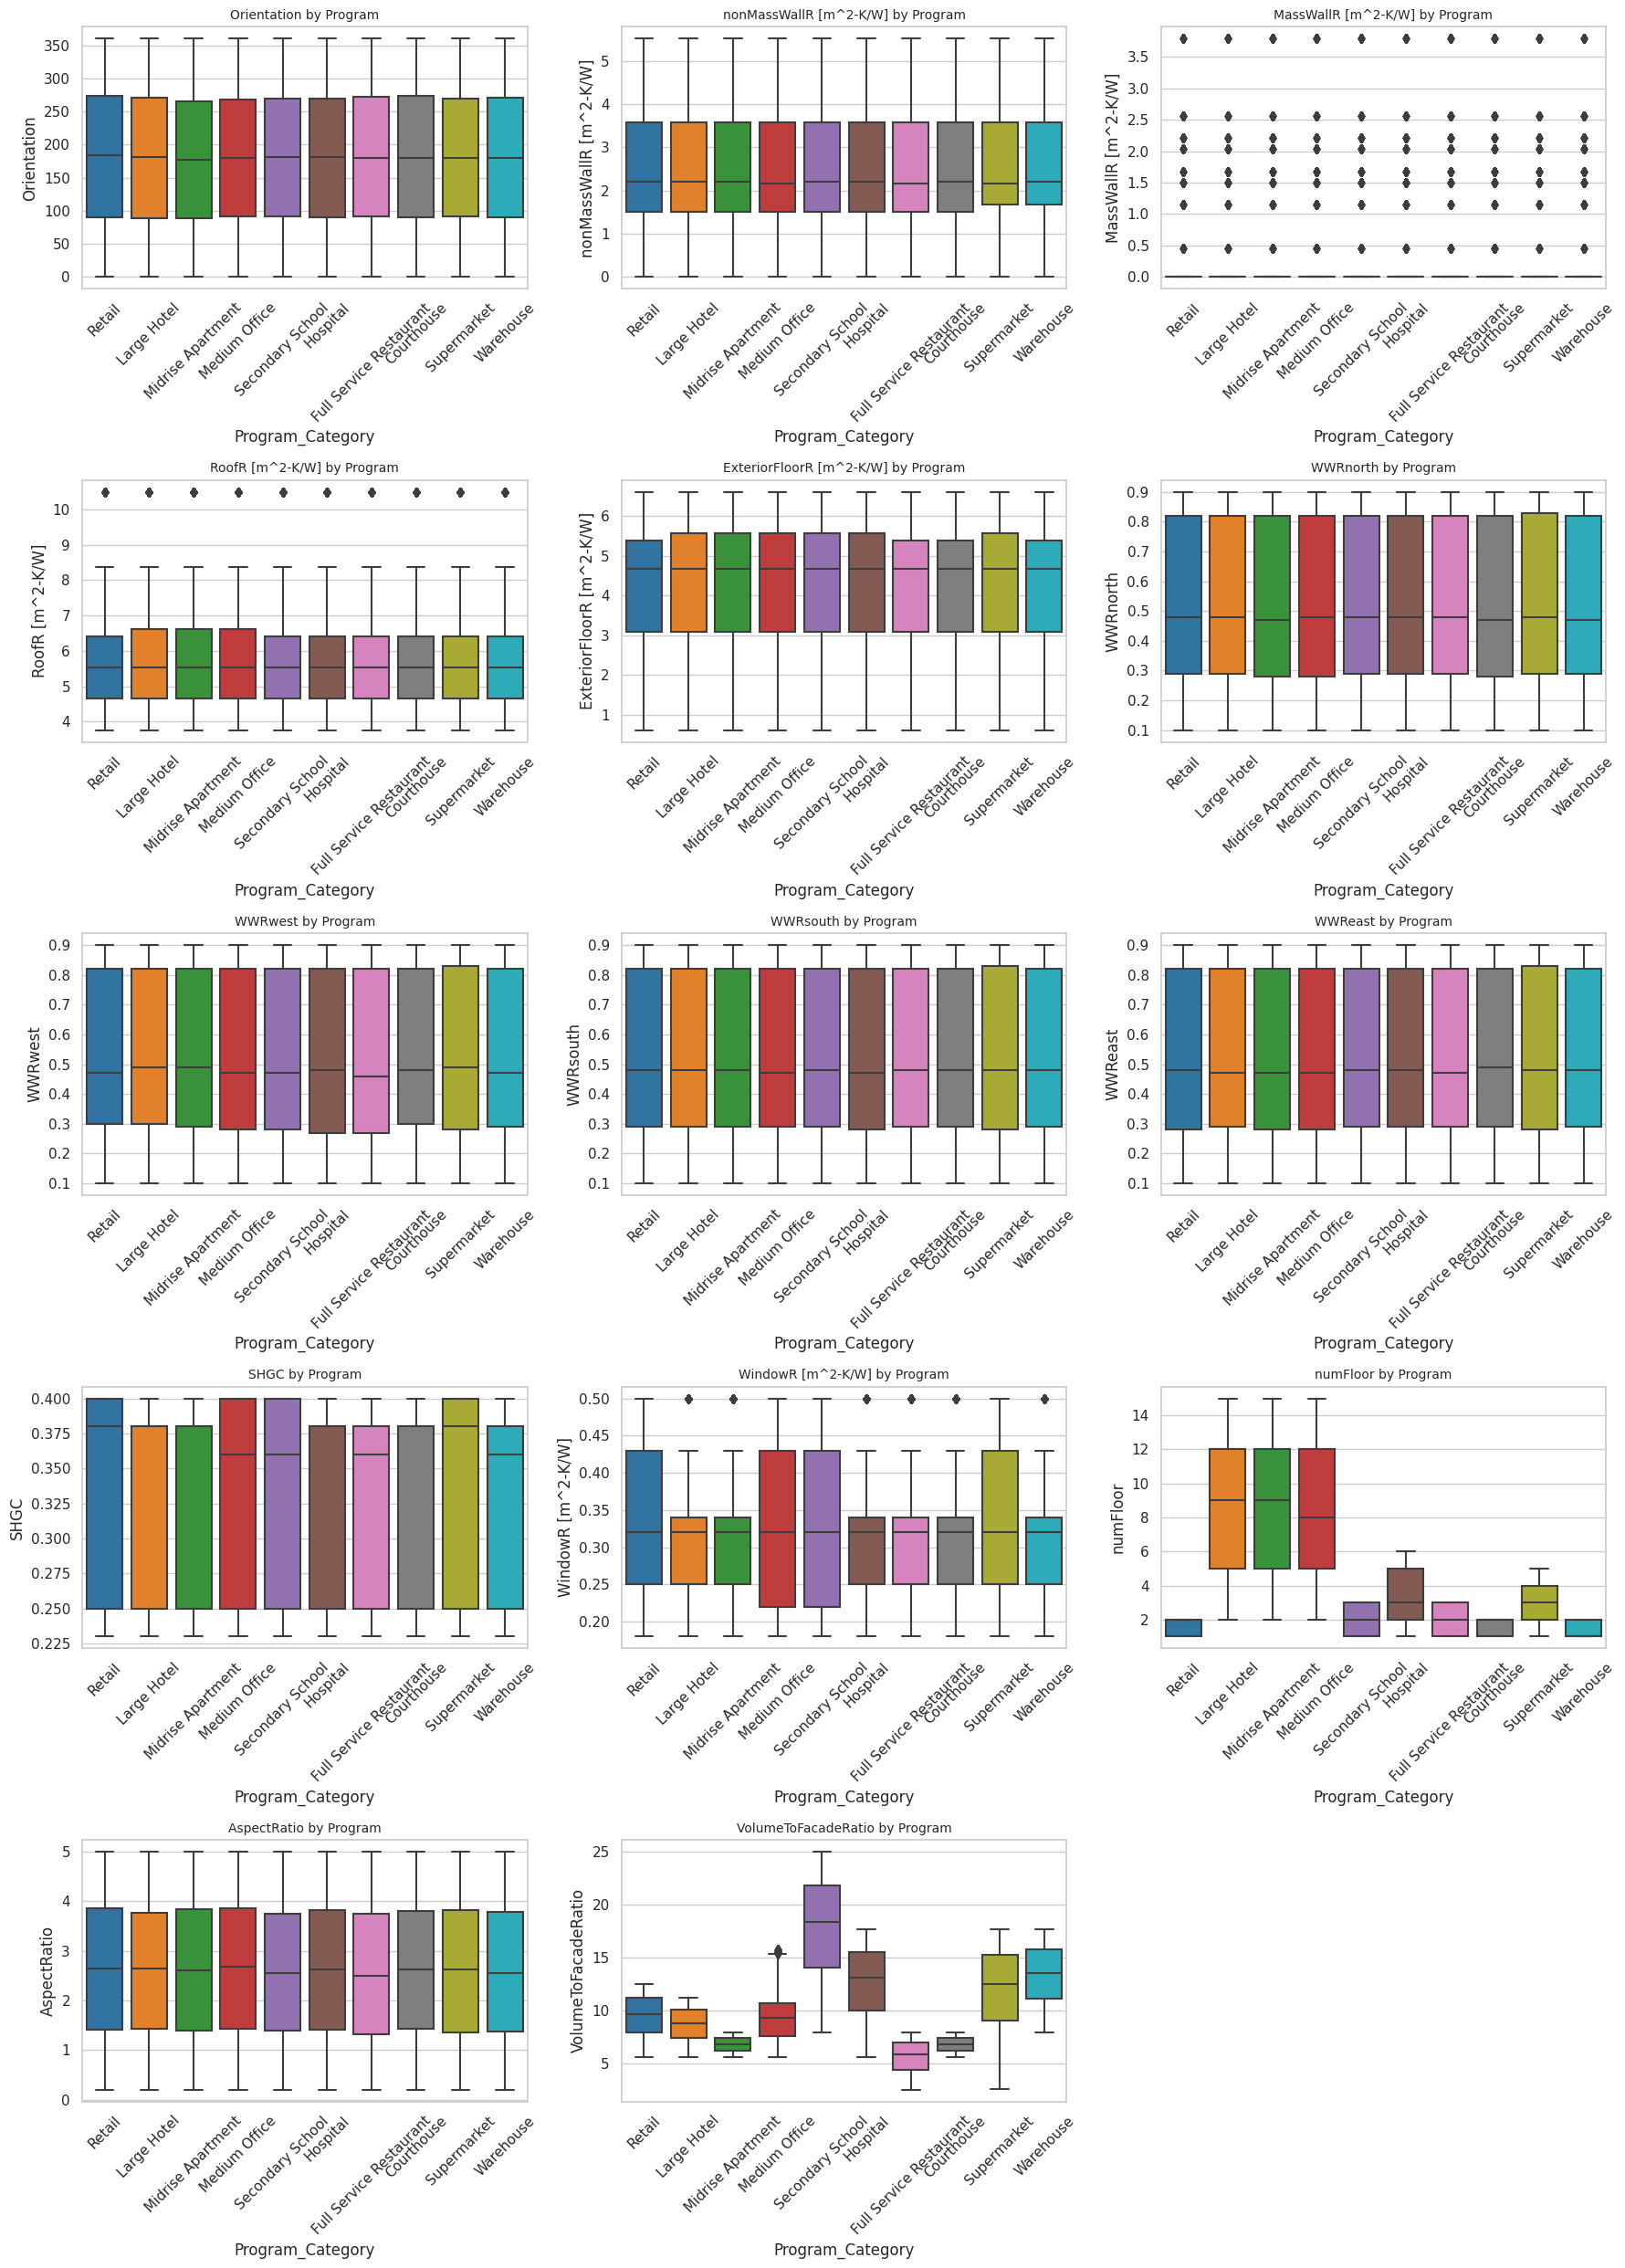

In [65]:
cols = 3
rows = len(numerical_columns) // cols + (len(numerical_columns) % cols > 0)

fig, axs = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))

axs = axs.flatten()

for i in range(len(numerical_columns)):
    ax = axs[i]
    sns.boxplot(x='Program_Category', y=numerical_columns[i], data=fd_copy, ax=ax, palette='tab10')
    ax.set_title(f'{numerical_columns[i]} by Program', fontsize=10)
    ax.set_ylabel(numerical_columns[i])
    ax.tick_params(axis='x', rotation=45)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()